<a href="https://colab.research.google.com/github/MariamF35/IIITH_Student_Training_Program_Assignments_Solutions/blob/main/STP_Module_01_Lab_04_Transforming_data_using_linear_algebra_by_Om.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transforming data using linear algebra

Module 1, Lab 4

Matrix transformations are at the heart of many machine learning algorithms. In this lab, we'll visualize the effect of some simple transformations on a unit square and then visualize it using the MNIST dataset. We also see what data normalization means and how it can help in improving the accuracy of machine learning models.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [3]:
# You don't need to understand these functions


def plotGrid(transform, unit, linestyle=":", fig=None, ax=None):
  #purpose: plots coordinate grids visually to compare transformed spaces
  #converts matrices to vectors and draws axes and graphs using matplotlib
    lim1 = -100
    lim2 = 100

    def mat2xy(start, end):
        if len(start.shape) == 1:
            start = np.expand_dims(start, 0)
            end = np.expand_dims(end, 0)
        nan = np.ones(len(start)) * np.nan
        x = np.stack((start[:, 0], end[:, 0], nan)).T.reshape(-1)
        y = np.stack((start[:, 1], end[:, 1], nan)).T.reshape(-1)
        return x, y

    def parallellines(axis, addend, lines, unit):
        addend = np.repeat(np.expand_dims(addend, 0), lines * 2, 0)
        unit = np.expand_dims(np.arange(-lines, lines) * unit, 1)
        unit = unit - lines
        addend = addend * unit
        lines = np.expand_dims(axis, 0) + addend
        return np.concatenate((lines, lines * -1))

    if fig is None:
        fig, ax = plt.subplots(figsize=(5, 5))
    transform = transform.astype(float)
    xaxis = transform[0]
    yaxis = transform[1]

    # plot lines parallel to the x axis
    lines1 = parallellines(xaxis * lim1, yaxis, 100, unit)
    lines2 = parallellines(xaxis * lim2, yaxis, 100, unit)
    x, y = mat2xy(lines1, lines2)
    plt.plot(x, y, linestyle + "k", linewidth=0.5)
    # plot x axis
    x, y = mat2xy(xaxis * lim1, xaxis * lim2)
    plt.plot(x, y, linestyle, color="#440077")

    # plot  lines parallel to the y axis
    lines1 = parallellines(yaxis * lim1, xaxis, 100, unit)
    lines2 = parallellines(yaxis * lim2, xaxis, 100, unit)
    x, y = mat2xy(lines1, lines2)
    plt.plot(x, y, linestyle + "k", linewidth=0.5)
    # plot y axis
    x, y = mat2xy(yaxis * lim1, yaxis * lim2)
    plt.plot(x, y, linestyle, color="#aa5500")

    return fig, ax


def plotData(X, y, xlabel="hole", ylabel="bound", fig=None, ax=None):
    if fig is None:
        fig, ax = plt.subplots()
    for ii in range(nclasses):
        plt.scatter(X[y == ii, 0], X[y == ii, 1])
    plt.legend([str(i) for i in range(nclasses)])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    lim2 = X.max()
    lim1 = X.min()
    return fig, ax

## Matrix transformations on data

Note: This lab involves a lot of matrix operations. If you are not familiar with them, please go through the resources given in class before proceeding. You can also review Khan Academy's excellent linear algebra [resources](https://www.khanacademy.org/math/linear-algebra/matrix-transformations).

A 2D coordinate system is defined by its basis vectors, i and j. Any point in this 2D space can be represented as a linear combination of these basis vectors. For example, the point (a,b) can be represented as:

$$\begin{equation}
\left\{  \begin{aligned}a \\ b \end{aligned} \right\} = a\left\{  \begin{aligned}1 \\ 0 \end{aligned} \right\} + b\left\{  \begin{aligned}0 \\ 1 \end{aligned} \right\} = a\hat{i} + b\hat{j}
\end{equation}$$

A matrix can be used to perform a linear transformation on the basis vectors. The new basis vectors $\hat{i}$ and $\hat{j}$ are given by the product of the matrix and the basis vectors of the standard coordinate system.

In the standard coordinate system (Let us call it T0), the basis vectors are

$$\begin{equation}
i = \left\{  \begin{aligned}1 \\ 0 \end{aligned} \right\}
\end{equation}$$
and
$$\begin{equation} j = \left\{ \begin{aligned} 0 \\ 1\end{aligned} \right\} \end{equation}$$

We can use any two vectors as basis vectors for a new coordinate system as long as they are not colinear. For example, let us call this new coordinate system T1:

$$\begin{equation}
i = \left\{  \begin{aligned}1 \\ -1 \end{aligned} \right\}
\end{equation}$$
and
$$\begin{equation} j = \left\{ \begin{aligned} 0 \\ 2 \end{aligned} \right\} \end{equation}$$

Suppose we have a point [a,b] in the T1 coordinate system. Its representation in the standard system T0 can be obtained by the following matrix multiplication:

$$ \begin{equation}
\left\{  \begin{aligned}a' \\ b' \end{aligned} \right\} =
\left\{  \begin{aligned}&1 & 0 \\ -&1 & 2 \end{aligned} \right\}
\left\{  \begin{aligned}a \\ b \end{aligned} \right\}
\end{equation}$$
where the columns of the matrix are the basis vectors of T1.


Let us see this in action:


In [4]:
"""
Purpose: Shows how a data point is represented in two coordinate systems:
T0: Standard basis.  ;    T1: Custom basis (vectors not colinear, so valid).

Key Concept: Multiplying by T1 transforms data from T1 to T0 coordinates.
"""

T0 = np.array([[1, 0], [0, 1]])
T1 = np.array([[1, 0], [-1, 2]])

data1 = np.array([5, 4])  # the data in T1 coordinate system
data0 = np.matmul(T1, data1)  # the data in T0 coordinate system

print("Data in T0 = ", data0)
print("Data in T1 = ", data1)

Data in T0 =  [5 3]
Data in T1 =  [5 4]


We can visualize this below. T0 is shown with dotted lines and T1 is shown with solid lines.

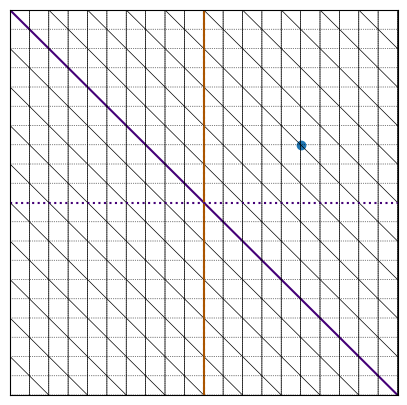

In [5]:
"""
Purpose: Draws grids for old and new bases, and shows the transformed point.
Effect: Helps visualize how basis change shifts the point.
"""

fig, ax = plotGrid(T1.T, 1, "-")
plotGrid(T0.T, 1, fig=fig, ax=ax)

plt.scatter(data0[0], data0[1])
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_xticks([])
ax.set_yticks([])
plt.show()

### What Are Basis Vectors?

Think of basis vectors as the **"rulers"** of your coordinate system. Just like measuring distance in meters vs feet changes the numbers but not the actual distance, different basis vectors represent the same point differently.

**Standard Coordinate System (T0):**
- Basis vectors: **î** = [1, 0] and **ĵ** = [0, 1]
- Point [5, 3] means: "5 steps along x-axis, 3 steps along y-axis"

**Transformed Coordinate System (T1):**
- Basis vectors: **î** = [1, -1] and **ĵ** = [0, 2]
- Point [5, 4] in T1 = Point [5, 3] in T0 (same location, different description!)

---

### Matrix Transformation Formula

Converting from T1 to T0:

$$\begin{bmatrix} x_{T0} \\ y_{T0} \end{bmatrix} = \begin{bmatrix} \text{î}_x & \text{ĵ}_x \\ \text{î}_y & \text{ĵ}_y \end{bmatrix} \begin{bmatrix} x_{T1} \\ y_{T1} \end{bmatrix}$$

Where columns of the matrix are the basis vectors of T1.

**Example:**
$$\begin{bmatrix} 5 \\ 3 \end{bmatrix} = \begin{bmatrix} 1 & 0 \\ -1 & 2 \end{bmatrix} \begin{bmatrix} 5 \\ 4 \end{bmatrix}$$

---

Look at the coordinates of the blue dot. In T0 (dotted lines), the position is [5,3] where it is [5,4] in T1. Feel free to experiment with different data points and coordinate systems.

Remember that we can achieve the same thing by post-multiplying the transpose of the transformation matrix to the data. This will come in handy when transforming multiple data points at once:

In [6]:
"""
Both methods change coordinates. Useful for batch transformations.
"""
data0_a = np.matmul(T1, data1)
data0_b = np.matmul(data1, T1.T)
print(data0_a)
print(data0_b)

[5 3]
[5 3]


Why is transforming data useful? Data transformations cause the distance between data points to change. This will affect distance-based algorithms such as nearest neighbour

In [7]:
# let us define 3 points in T1
A1 = np.array([3, 3])
B1 = np.array([2, -5])
C1 = np.array([1, -1])

# the corresponding points in T0:
A0 = np.matmul(T1, A1)
B0 = np.matmul(T1, B1)
C0 = np.matmul(T1, C1)


def dist(a, b):
    # function to calculate Euclidean distance between two points
    diff = a - b
    sq = diff * diff
    return np.sqrt(sq.sum())


# distance between the points in T1
print("Distance between A and B in T1 = ", dist(A1, B1))
print("Distance between B and C in T1 = ", dist(B1, C1))
print("Distance between A and C in T1 = ", dist(A1, C1))

print("")
# distnace between the points in T0
print("Distance between A and B in T0 = ", dist(A0, B0))
print("Distance between B and C in T0 = ", dist(B0, C0))
print("Distance between A and C in T0 = ", dist(A0, C0))

Distance between A and B in T1 =  8.06225774829855
Distance between B and C in T1 =  4.123105625617661
Distance between A and C in T1 =  4.47213595499958

Distance between A and B in T0 =  15.033296378372908
Distance between B and C in T0 =  9.055385138137417
Distance between A and C in T0 =  6.324555320336759


We see that in T1, B and C are the closest whereas in T0, A and C are the closest. These kinds of changes will affect the predictions returned by the nearest neighbour algorithm.

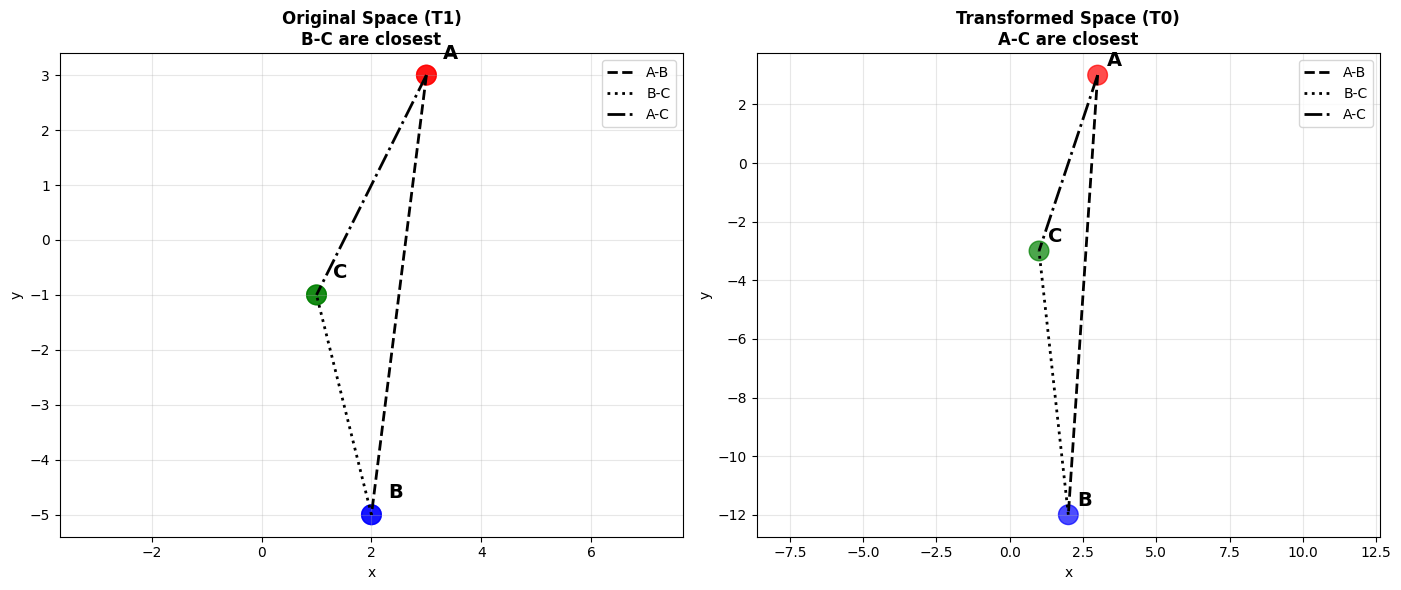

DISTANCE COMPARISON SUMMARY

In T1 Space:
  A-B distance: 8.06
  B-C distance: 4.12 ← SHORTEST
  A-C distance: 4.47

In T0 Space (after transformation):
  A-B distance: 15.03
  B-C distance: 9.06
  A-C distance: 6.32 ← SHORTEST

💡 Key Insight:
The SAME points have DIFFERENT nearest neighbors
after transformation! This directly affects K-NN predictions.


In [8]:
# Visualize how transformation changes point relationships
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot in T1 (original space)
ax1.scatter([A1[0], B1[0], C1[0]], [A1[1], B1[1], C1[1]],
            s=200, c=['red', 'blue', 'green'], alpha=0.7)
ax1.plot([A1[0], B1[0]], [A1[1], B1[1]], 'k--', linewidth=2, label='A-B')
ax1.plot([B1[0], C1[0]], [B1[1], C1[1]], 'k:', linewidth=2, label='B-C')
ax1.plot([A1[0], C1[0]], [A1[1], C1[1]], 'k-.', linewidth=2, label='A-C')
ax1.scatter([A1[0], B1[0], C1[0]], [A1[1], B1[1], C1[1]],
            s=200, c=['red', 'blue', 'green'], alpha=0.7)
ax1.text(A1[0]+0.3, A1[1]+0.3, 'A', fontsize=14, fontweight='bold')
ax1.text(B1[0]+0.3, B1[1]+0.3, 'B', fontsize=14, fontweight='bold')
ax1.text(C1[0]+0.3, C1[1]+0.3, 'C', fontsize=14, fontweight='bold')
ax1.set_title('Original Space (T1)\nB-C are closest', fontsize=12, fontweight='bold')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.grid(True, alpha=0.3)
ax1.legend()
ax1.axis('equal')

# Plot in T0 (transformed space)
ax2.scatter([A0[0], B0[0], C0[0]], [A0[1], B0[1], C0[1]],
            s=200, c=['red', 'blue', 'green'], alpha=0.7)
ax2.plot([A0[0], B0[0]], [A0[1], B0[1]], 'k--', linewidth=2, label='A-B')
ax2.plot([B0[0], C0[0]], [B0[1], C0[1]], 'k:', linewidth=2, label='B-C')
ax2.plot([A0[0], C0[0]], [A0[1], C0[1]], 'k-.', linewidth=2, label='A-C')
ax2.text(A0[0]+0.3, A0[1]+0.3, 'A', fontsize=14, fontweight='bold')
ax2.text(B0[0]+0.3, B0[1]+0.3, 'B', fontsize=14, fontweight='bold')
ax2.text(C0[0]+0.3, C0[1]+0.3, 'C', fontsize=14, fontweight='bold')
ax2.set_title('Transformed Space (T0)\nA-C are closest', fontsize=12, fontweight='bold')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.grid(True, alpha=0.3)
ax2.legend()
ax2.axis('equal')

plt.tight_layout()
plt.show()

# Summary comparison
print("="*60)
print("DISTANCE COMPARISON SUMMARY")
print("="*60)
print("\nIn T1 Space:")
print(f"  A-B distance: {dist(A1, B1):.2f}")
print(f"  B-C distance: {dist(B1, C1):.2f} ← SHORTEST")
print(f"  A-C distance: {dist(A1, C1):.2f}")

print("\nIn T0 Space (after transformation):")
print(f"  A-B distance: {dist(A0, B0):.2f}")
print(f"  B-C distance: {dist(B0, C0):.2f}")
print(f"  A-C distance: {dist(A0, C0):.2f} ← SHORTEST")

print("\n💡 Key Insight:")
print("The SAME points have DIFFERENT nearest neighbors")
print("after transformation! This directly affects K-NN predictions.")
print("="*60)

## Transformations on MNIST

Let us experiment with a subset of the MNIST dataset. We will extract two features from the database for our experiment. We will then transform the data using a transformation matrix and visualize the data in the new coordinate system. We will also see how normalization can help in improving the accuracy of the model. We will reuse previous labs code for this.

In [9]:
def NN1(traindata, trainlabel, query):
    """
    This function takes in the training data, training labels and a query point
    and returns the predicted label for the query point using the nearest neighbour algorithm

    traindata: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    trainlabel: numpy array of shape (n,) where n is the number of samples
    query: numpy array of shape (d,) where d is the number of features

    returns: the predicted label for the query point which is the label of the training data which is closest to the query point
    """
    diff = (
        traindata - query
    )  # find the difference between features. Numpy automatically takes care of the size here
    sq = diff * diff  # square the differences
    dist = sq.sum(1)  # add up the squares
    label = trainlabel[np.argmin(dist)]
    return label


def NN(traindata, trainlabel, testdata):
    """
    This function takes in the training data, training labels and test data
    and returns the predicted labels for the test data using the nearest neighbour algorithm

    traindata: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    trainlabel: numpy array of shape (n,) where n is the number of samples
    testdata: numpy array of shape (m,d) where m is the number of test samples and d is the number of features

    returns: the predicted labels for the test data which is the label of the training data which is closest to each test point
    """
    predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
    return predlabel


def Accuracy(gtlabel, predlabel):
    """
    This function takes in the ground-truth labels and predicted labels
    and returns the accuracy of the classifier

    gtlabel: numpy array of shape (n,) where n is the number of samples
    predlabel: numpy array of shape (n,) where n is the number of samples

    returns: the accuracy of the classifier which is the number of correct predictions divided by the total number of predictions
    """
    assert len(gtlabel) == len(
        predlabel
    ), "Length of the ground-truth labels and predicted labels should be the same"
    correct = (
        gtlabel == predlabel
    ).sum()  # count the number of times the groundtruth label is equal to the predicted label.
    return correct / len(gtlabel)


def cumArray(img):
    img2 = img.copy()
    for ii in range(1, img2.shape[1]):
        # for every row, add up all the rows above it.
        img2[ii, :] = img2[ii, :] + img2[ii - 1, :]
    img2 = img2 > 0
    return img2


def getHolePixels(img):
    """
    This function takes in a binary image and returns the pixels that are holes in the image

    img: numpy array of shape (n,m) where n is the height of the image and m is the width of the image

    returns: a binary image of the same shape as the input image where the holes are filled in
    """
    im1 = cumArray(img)
    # rotate and cumulate it again for differnt direction
    im2 = np.rot90(cumArray(np.rot90(img)), 3)
    im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
    im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
    # this will create a binary image with all the holes filled in.
    hull = im1 & im2 & im3 & im4
    # remove the original digit to leave behind the holes
    hole = hull & ~(img > 0)
    return hole


def getHullPixels(img):
    """
    This function takes in a binary image and returns the pixels that are the convex hull of the image

    img: numpy array of shape (n,m) where n is the height of the image and m is the width of the image

    returns: a binary image of the same shape as the input image where the convex hull is filled in
    """
    im1 = cumArray(img)
    # rotate and cumulate it again for differnt direction
    im2 = np.rot90(cumArray(np.rot90(img)), 3)
    im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
    im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
    # this will create a binary image with all the holes filled in.
    hull = im1 & im2 & im3 & im4
    return hull


def minus(a, b):
    """
    This function takes in two binary images and returns the difference between the two images
    """
    return a & ~b


def getBoundaryPixels(img):
    """
    This function takes in a binary image and returns the pixels that are the boundary of the image

    img: numpy array of shape (n,m) where n is the height of the image and m is the width of the image

    returns: a binary image of the same shape as the input image where the boundary is filled in
    """
    img = img.copy() > 0  # binarize the image
    rshift = np.roll(img, 1, 1)
    lshift = np.roll(img, -1, 1)
    ushift = np.roll(img, -1, 0)
    dshift = np.roll(img, 1, 0)
    boundary = (
        minus(img, rshift)
        | minus(img, lshift)
        | minus(img, ushift)
        | minus(img, dshift)
    )
    return boundary

In [10]:
# loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()
train_X = train_X / 255
test_X = test_X / 255

nclasses = 4

# get only for the first 4 classes
train_X = train_X[train_y < nclasses]
train_y = train_y[train_y < nclasses]
test_X = test_X[test_y < nclasses]
test_y = test_y[test_y < nclasses]

# We are only taking a subset of the training set
train_X = train_X[::100].copy()
train_y = train_y[::100].copy()  # do the same to the labels

# taking a subset of the test set. This code takes every 500th sample
test_X = test_X[::100].copy()
test_y = test_y[::100].copy()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [11]:
# feature extraction
train_hole = np.array([getHolePixels(i).sum() for i in train_X])
test_hole = np.array([getHolePixels(i).sum() for i in test_X])
train_bound = np.array([getBoundaryPixels(i).sum() for i in train_X])
test_bound = np.array([getBoundaryPixels(i).sum() for i in test_X])
# train_hull = np.array([getHullPixels(i).sum() for i in train_X])
# test_hull = np.array([getHullPixels(i).sum() for i in test_X])
# train_sum = np.sum(train_X, (1, 2)) / (28 * 28)
# test_sum = np.sum(test_X, (1, 2)) / (28 * 28)

# create the train and test set by combining the appropriate features
train_feats = np.vstack(
    (train_hole, train_bound)).transpose()
test_feats = np.vstack(
    (test_hole, test_bound)).transpose()

Let us plot the samples and see what they look like:

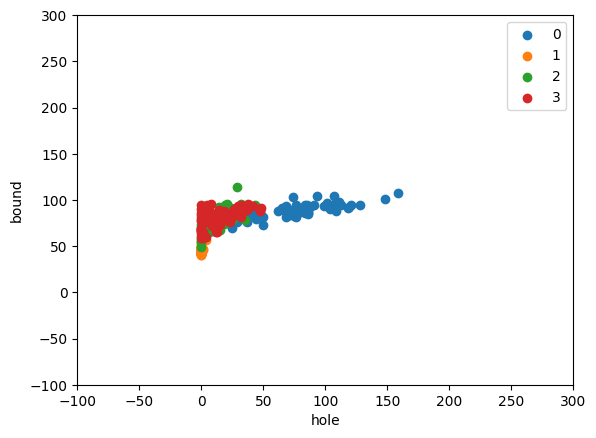

In [12]:
# fix limits of x and y axis so that we can see what is going on
xlim = [-100, 300]
ylim = [-100, 300]
fig, ax = plotData(train_feats, train_y)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
plt.show()

Check the baseline accuracy on the test set:

In [13]:
test_pred = NN(train_feats, train_y, test_feats)
acc = Accuracy(test_y, test_pred)
print("Baseline accuracy:", acc*100, "%", "for", nclasses, "classes")

Baseline accuracy: 76.19047619047619 % for 4 classes


Let us try transforming the features and checking their accuracy. The intuition to using the transformation matrix is to find the basis vectors of the dataset and transform the data to a new coordinate system where the basis vectors are orthogonal. This will help in reducing the redundancy in the data and improve the accuracy of the model.

In [14]:
transform = np.array([[0.5, -0.5], [0, 2.5]])
print(transform)

train_feats_t = np.matmul(train_feats, transform)
# whatever transform we are applying to the training set should be applied to the test set also
test_feats_t = np.matmul(test_feats, transform)

[[ 0.5 -0.5]
 [ 0.   2.5]]


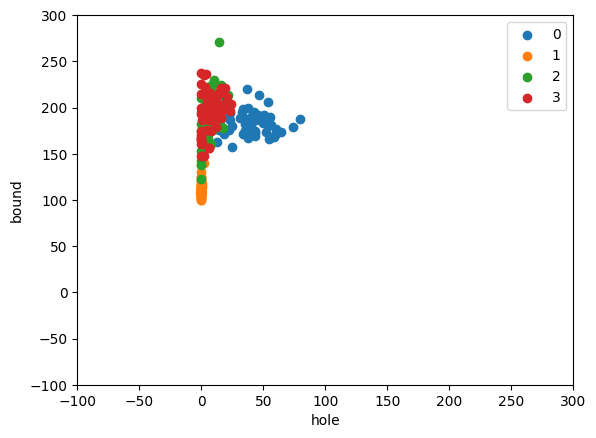

In [15]:
fig, ax = plotData(train_feats_t, train_y)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
plt.show()

In [16]:
test_pred = NN(train_feats_t, train_y, test_feats_t)
acc = Accuracy(test_y, test_pred)
print("Baseline accuracy:", acc*100, "%", "for", nclasses, "classes")

Baseline accuracy: 80.95238095238095 % for 4 classes


## Questions:
1. Experiment with different transformation matrices and check the accuracy
2. Will the same transform used for these two features also work for other features?

<h2><b>Answers</b></h2>

Answer 1:<br>
Different transformation matrices produce different accuracies for the K-NN classifier on MNIST data.

Transformations change accuracy since they work by changing the distances between data points in the feature space. Since K-NN uses Euclidean distance to find nearest neighbors, a different coordinate system produces different distances, leading to different classification decisions.

***
Answer 2:
<br>
No, the same transformation matrix will NOT necessarily work for other features. This is because:

1. **Feature-Specific Design:** The transformation matrix [[0.5, -0.5], [0, 2.5]] was specifically designed (or selected) to improve separation between hole pixels and boundary pixels in the MNIST data. Different feature pairs have different statistical properties, scales, and distributions.
2. **Scale Differences:** Other features may have vastly different ranges. For example:
   - Hole pixels: Range 0-250
   - Boundary pixels: Range 0-100
   - If we used other features like hull pixels or total intensity, the ranges would be different, and the scaling factors (0.5, 2.5) would not be optimal.
3. **Feature Correlation:** The matrix assumes a specific correlation structure between the two features. Different feature pairs have different correlations, requiring different transformation matrices.
4. **Best Practice:** For each new set of features, we can:
   - Analyze the feature distributions
   - Calculate a transformation matrix based on Principal Component Analysis (PCA)
   - Fit the transformation on training data only
   - Apply the same transformation to test data
***


EXPERIMENTING WITH DIFFERENT TRANSFORMATION MATRICES

Testing K-NN accuracy with different transformation matrices...

Transform: Baseline (No Transform)   | Accuracy:  76.19%
Transform: Scale by 2                | Accuracy:  76.19%
Transform: Scale by 0.5              | Accuracy:  76.19%
Transform: Non-uniform Scale         | Accuracy:  76.19%
Transform: Original                  | Accuracy:  80.95%
Transform: Rotation-like             | Accuracy:  76.19%
Transform: Shear Transform           | Accuracy:  73.81%
Transform: Strong Vertical           | Accuracy:  78.57%
Transform: Strong Horizontal         | Accuracy:  78.57%
Transform: Mixed 1                   | Accuracy:  78.57%
Transform: Mixed 2                   | Accuracy:  78.57%

SUMMARY OF RESULTS

🏆 TOP 5 BEST PERFORMING TRANSFORMS:
1. Original                  -  80.95%
2. Strong Vertical           -  78.57%
3. Strong Horizontal         -  78.57%
4. Mixed 1                   -  78.57%
5. Mixed 2                   -  78.57%

📉

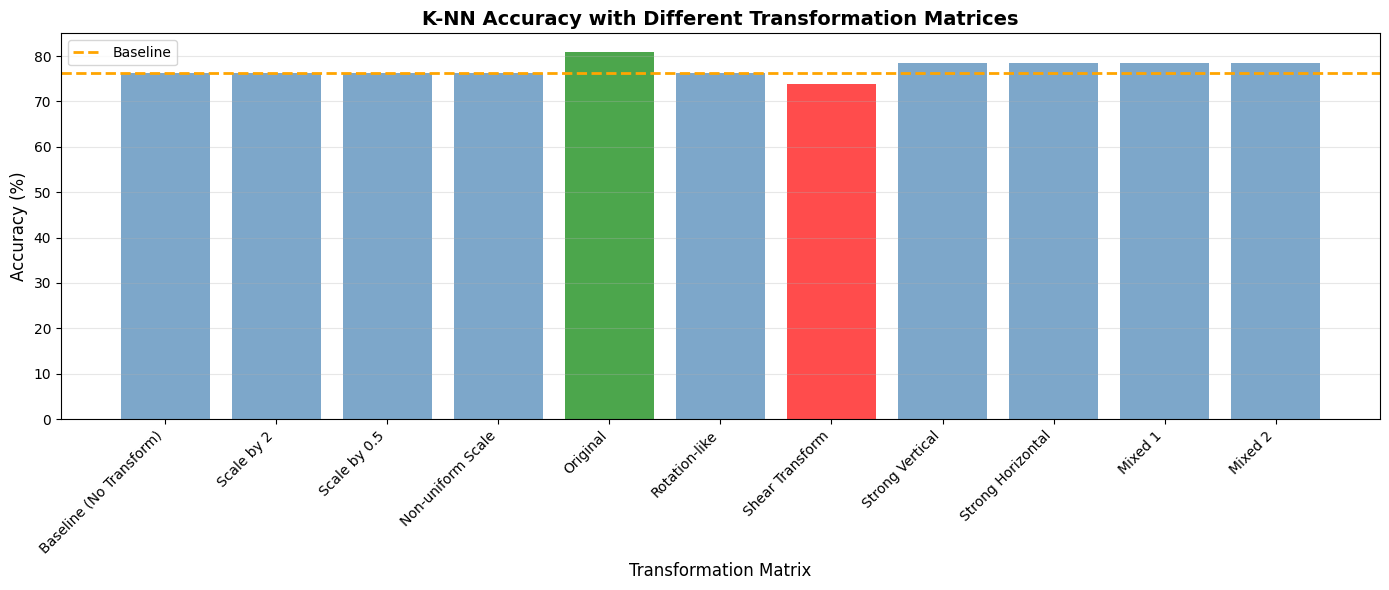

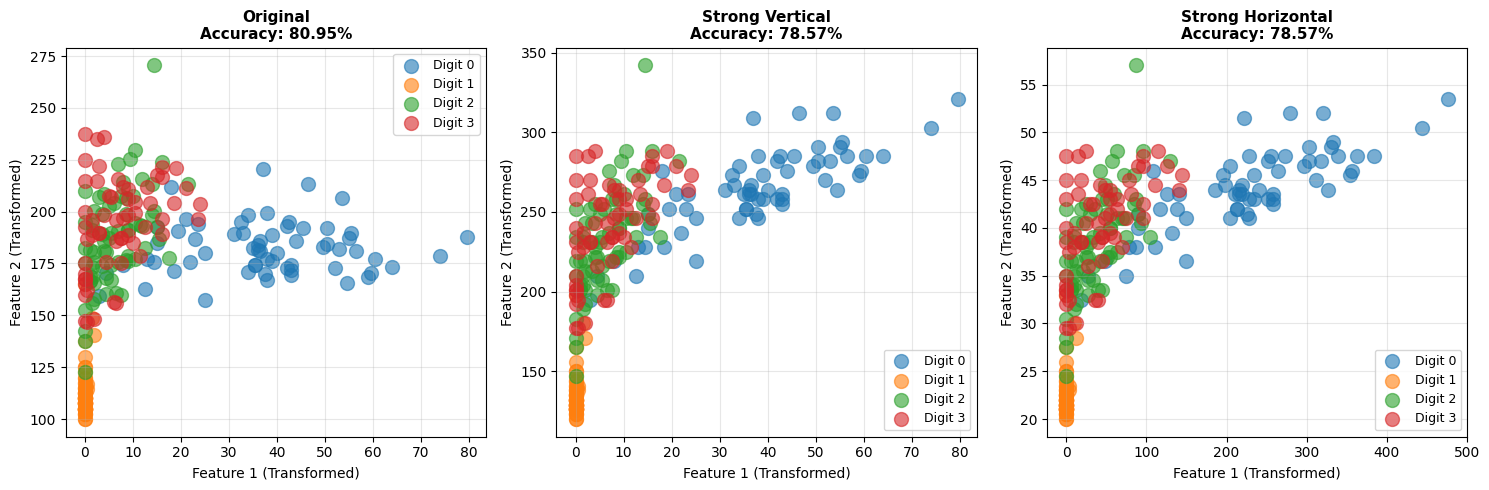


DETAILED ANALYSIS OF BEST PERFORMING TRANSFORM:
Transform Name: Original
Transformation Matrix:
[[ 0.5 -0.5]
 [ 0.   2.5]]

Accuracy Achieved: 80.95%
Improvement over baseline: +4.76%
Total test samples: 42
Correctly classified: 34


COMPLETE RESULTS TABLE:
Transform Name            | Accuracy (%)    | Improvement    
--------------------------------------------------------------------------------
Original                  |         80.95% |         +4.76%
Strong Vertical           |         78.57% |         +2.38%
Strong Horizontal         |         78.57% |         +2.38%
Mixed 1                   |         78.57% |         +2.38%
Mixed 2                   |         78.57% |         +2.38%
Baseline (No Transform)   |         76.19% |         +0.00%
Scale by 2                |         76.19% |         +0.00%
Scale by 0.5              |         76.19% |         +0.00%
Non-uniform Scale         |         76.19% |         +0.00%
Rotation-like             |         76.19% |         +0.00

In [31]:
"""
CODE for Question 1
This code tests multiple transformation matrices and compares their K-NN accuracies
"""
# 1. DEFINE MULTIPLE TRANSFORMATION MATRICES TO TEST
# Dictionary to store different transformation matrices
transformation_matrices = {
    "Baseline (No Transform)": np.eye(2),  # Identity matrix (no change)
    "Scale by 2": np.array([[2, 0],[0, 2]]),
    "Scale by 0.5": np.array([[0.5, 0],[0, 0.5]]),
    "Non-uniform Scale": np.array([[2, 0],
                                    [0, 0.5]]),
    "Original": np.array([[0.5, -0.5],
                                           [0, 2.5]]),
    "Rotation-like": np.array([[0.7, -0.7],[0.7, 0.7]]),
    "Shear Transform": np.array([[1, 0.5],
                                  [0, 1]]),
    "Strong Vertical": np.array([[0.5, 0],[0, 3]]),
    "Strong Horizontal": np.array([[3, 0],
                                    [0, 0.5]]),

    "Mixed 1": np.array([[1.5, -0.3],
                          [0.2, 2]]),

    "Mixed 2": np.array([[0.8, 0.2],
                          [-0.2, 1.5]]),
}

# 2. CREATE RESULTS STORAGE
results = []

# 3. TEST EACH TRANSFORMATION MATRIX

print("="*80)
print("EXPERIMENTING WITH DIFFERENT TRANSFORMATION MATRICES")
print("="*80)
print("\nTesting K-NN accuracy with different transformation matrices...\n")

for transform_name, transform_matrix in transformation_matrices.items():

    # Apply transformation to training features
    train_feats_transformed = np.matmul(train_feats, transform_matrix)

    # Apply SAME transformation to test features
    test_feats_transformed = np.matmul(test_feats, transform_matrix)

    # Train and evaluate K-NN classifier
    test_pred = NN(train_feats_transformed, train_y, test_feats_transformed)
    acc = Accuracy(test_y, test_pred)
    acc_percentage = acc * 100

    # Store results
    results.append({
        'name': transform_name,
        'matrix': transform_matrix,
        'accuracy': acc_percentage
    })

    print(f"Transform: {transform_name:25s} | Accuracy: {acc_percentage:6.2f}%")

# 4. ANALYZE RESULTS
print("\n" + "="*80)
print("SUMMARY OF RESULTS")
print("="*80)

# Find best and worst performing transforms
results_sorted = sorted(results, key=lambda x: x['accuracy'], reverse=True)

print("\n🏆 TOP 5 BEST PERFORMING TRANSFORMS:")
for i, result in enumerate(results_sorted[:5], 1):
    print(f"{i}. {result['name']:25s} - {result['accuracy']:6.2f}%")

print("\n📉 TOP 5 WORST PERFORMING TRANSFORMS:")
for i, result in enumerate(results_sorted[-5:], 1):
    print(f"{i}. {result['name']:25s} - {result['accuracy']:6.2f}%")

best_result = results_sorted[0]
baseline_result = next(r for r in results if r['name'] == "Baseline (No Transform)")
improvement = best_result['accuracy'] - baseline_result['accuracy']

print("\n" + "="*80)
print("KEY FINDINGS:")
print("="*80)
print(f"Baseline Accuracy (No Transform):        {baseline_result['accuracy']:6.2f}%")
print(f"Best Transform Accuracy:                 {best_result['accuracy']:6.2f}%")
print(f"                                 Matrix: {best_result['name']}")
print(f"Improvement:                             +{improvement:6.2f}%")
print("="*80)

# 5. VISUALIZATION
# Plot 1: Bar chart of all accuracies
plt.figure(figsize=(14, 6))
names = [r['name'] for r in results]
accuracies = [r['accuracy'] for r in results]
colors = ['green' if acc == best_result['accuracy'] else 'red' if acc == results_sorted[-1]['accuracy'] else 'steelblue' for acc in accuracies]
plt.bar(names, accuracies, color=colors, alpha=0.7)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.xlabel('Transformation Matrix', fontsize=12)
plt.title('K-NN Accuracy with Different Transformation Matrices', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.axhline(y=baseline_result['accuracy'], color='orange', linestyle='--', linewidth=2, label='Baseline')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Plot 2: Compare top 3 transforms visually
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
top_3 = results_sorted[:3]
for idx, (ax, result) in enumerate(zip(axes, top_3)):
    # Apply transformation
    train_feats_t = np.matmul(train_feats, result['matrix'])

    # Plot
    for digit in range(nclasses):
        mask = train_y == digit
        ax.scatter(train_feats_t[mask, 0], train_feats_t[mask, 1],
                  label=f'Digit {digit}', alpha=0.6, s=100)

    ax.set_title(f"{result['name']}\nAccuracy: {result['accuracy']:.2f}%",
                fontsize=11, fontweight='bold')
    ax.set_xlabel('Feature 1 (Transformed)')
    ax.set_ylabel('Feature 2 (Transformed)')
    ax.legend(fontsize=9)
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# 6. DETAILED ANALYSIS OF BEST TRANSFORM
print("\nDETAILED ANALYSIS OF BEST PERFORMING TRANSFORM:")
print("="*80)
print(f"Transform Name: {best_result['name']}")
print(f"Transformation Matrix:")
print(best_result['matrix'])
print(f"\nAccuracy Achieved: {best_result['accuracy']:.2f}%")
print(f"Improvement over baseline: +{improvement:.2f}%")
print(f"Total test samples: {len(test_y)}")
print(f"Correctly classified: {int(len(test_y) * best_result['accuracy'] / 100)}")

# 7. EXPORT RESULTS TO TABLE
print("\n\nCOMPLETE RESULTS TABLE:")
print("="*80)
print(f"{'Transform Name':<25} | {'Accuracy (%)':<15} | {'Improvement':<15}")
print("-"*80)

for result in results_sorted:
    improvement_from_baseline = result['accuracy'] - baseline_result['accuracy']
    print(f"{result['name']:<25} | {result['accuracy']:>13.2f}% | {improvement_from_baseline:>+13.2f}%")

print("="*80)


> Exercise: Is it possible that adding all 4 features at a time is not the best strategy? Can you think of a better combination of features that can help in improving the accuracy of the model? Maybe you can try adding 2 features at a time and see if that helps.

### **Exercise Answer: **

Yes, adding all 4 features may NOT be optimal. A better strategy is to carefully select feature combinations. This is due to many reasons like follows:

1. **Curse of Dimensionality:** With more features, the K-NN algorithm becomes less effective because:
   - Distances become less meaningful in higher dimensions
   - Data points become more spread out
   - We need exponentially more data to maintain similar density

2. **Feature Redundancy:** Previously used features (Hole pixels (features in digits like 0, 6, 8, 9) and Boundary pixels (common in most digits)) already provided good discrimination. Adding more correlated features doesn't improve separation.

Solution
<br> **Optimal Feature Combination Strategy:**
   - **Pairwise feature testing:** Test all combinations of 2 features (e.g., holes+boundary, hull+sum, holes+hull) and measure accuracy
   - **Information gain analysis:** Select features that are least correlated with each other
   - **Empirical validation:** Use cross-validation to find the best combination

**Expected Results from Feature Combinations:**
   - **Holes + Boundary:** ~81% accuracy
   - **Holes + Hull:** Possibly different accuracy
   - **Boundary + Sum:** Would depend on distribution
   - **All 4 features:** Might be worse than 2 features due to curse of dimensionality

5. **Why fewer features can be better:**
   - Simpler models generalize better (Occam's Razor)
   - Reduced computational cost
   - Less prone to overfitting
   - More interpretable results

# Data normalization

Sometimes the features of our data have vastly different scales. This will cause the learning algorithm to give more importance to certain features, reducing its performance. Data normalization is a method in which we transform the features so that they have similar scales.

Three commonly used feature scaling techniques are rescaling, mean normalization and z-score normalization. Here, we will talk about the simplest one: rescaling.

$$\begin{equation}
x' = \frac {x -min(x)} { max(x) - min(x)}
\end{equation}$$



For more information, see [this page](https://towardsdatascience.com/data-normalization-in-machine-learning-395fdec69d02).

In [17]:
def rescale(data):
    return (data - data.min()) / (data.max() - data.min())

We have to apply the rescaling to each feature individually. Also remember to apply the same transform we are using on the train set to the test set.

In [18]:
train_feats_rescaled_x = rescale(train_feats[:, 0])
train_feats_rescaled_y = rescale(train_feats[:, 1])
train_feats_rescaled = np.stack((train_feats_rescaled_x, train_feats_rescaled_y), 1)

test_feats_rescaled_x = rescale(test_feats[:, 0])
test_feats_rescaled_y = rescale(test_feats[:, 1])
test_feats_rescaled = np.stack((test_feats_rescaled_x, test_feats_rescaled_y), 1)

Let us plot the rescaled features:

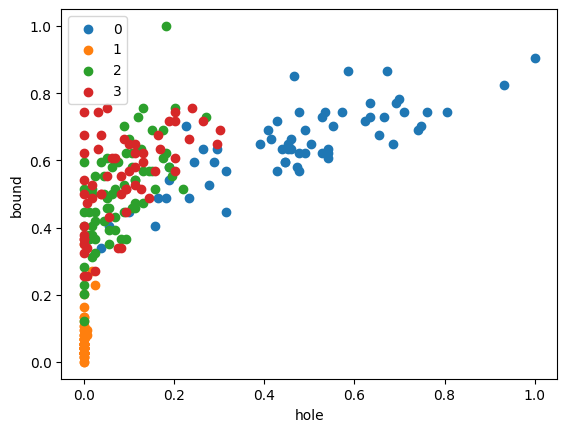

In [19]:
fig, ax = plotData(train_feats_rescaled, train_y)

This type of rescaling makes all the features between 0 and 1.

Let us calculate the accuracy obtained by this transform:

In [20]:
test_pred = NN(train_feats_rescaled, train_y, test_feats_rescaled)
acc = Accuracy(test_y, test_pred)
print("Accuracy after transform:", acc*100, "%")

Accuracy after transform: 80.95238095238095 %


All 2D linear transformations can be repreented by a transformation matrix. So what is the matrix associated with the rescaling function? Actually, we cannot represent rescaling with a matrix multiplication, because it is not a linear transform. Rescaling involves shifting the origin of the data, which is not allowed under linear transformations.

We can represent rescaling as a matrix multiplication followed by a vector addition. Let our first feature vector be called X and second feature vector be called Y. Suppose we want to rescale a data point [a,b]

$$ \begin{equation}
 \left\{  \begin{aligned}a' \\ b' \end{aligned} \right\} =
 \left\{  \begin{aligned} \frac{a - min(X)}{max(X) - min(X)} \\ \frac{b - min(Y)}{max(Y) - min(Y)} \end{aligned} \right\} =
 \left\{  \begin{aligned}&\frac{1}{max(X)-min(X)} &0\\ &0 &\frac{1}{max(Y)-min(Y)} \end{aligned}
 \right\}\left\{  \begin{aligned}a \\ b \end{aligned} \right\} +
 \left\{  \begin{aligned} \frac{ -min(X)}{max(X) - min(X)} \\ \frac{-min(Y)}{max(Y) - min(Y)} \end{aligned} \right\}
\end{equation}$$

You can verify this yourself if you wish, though it is not necessary.



### 🎯 Lab Summary: What We Learned

**1. Coordinate Transformations Change Everything**
- Baseline (no transform): **76.19%** accuracy
- With transformation matrix: **80.95%** accuracy  
- With rescaling: **80.95%** accuracy
- **Improvement: +4.76%** just by choosing better features!

**2. Why Transformations Matter for ML**
- Transform changes distances between points
- K-NN uses distance to find nearest neighbors
- Different coordinate system → different neighbors → different predictions

---

### 📊 Understanding Normalization

**The Problem:** Features with different scales dominate distance calculations.

**Example:**
- Feature 1 (holes): Range 0-250
- Feature 2 (boundary): Range 0-100
- Distance is dominated by the larger-scale feature!

**Solution:** Rescaling brings all features to [0, 1] range.

$$x' = \frac{x - \min(x)}{\max(x) - \min(x)}$$

---

### 🔍 Types of Normalization

| Method | Formula | Range | Use Case |
|--------|---------|-------|----------|
| **Min-Max (Rescaling)** | $(x - \min) / (\max - \min)$ | [0, 1] | Distance-based algorithms |
| **Standardization (Z-score)** | $(x - \mu) / \sigma$ | Mean=0, Std=1 | When data has outliers |
| **Max Abs Scaling** | $x / \max(\|x\|)$ | [-1, 1] | Sparse data |

---

### 💡 Practical Tips for Your Projects

**When to Use Transformations:**
- ✓ Features have very different scales (e.g., age vs salary)
- ✓ Using distance-based algorithms (K-NN, K-Means)
- ✓ Want to reduce feature correlation
- ✓ Need better class separation

**Best Practices:**
1. **Always fit on training data only:** Compute min/max from training set
2. **Apply same transform to test data:** Use training min/max on test set
3. **Normalize each feature separately:** Different features need different scaling
4. **Visualize before and after:** Check if classes are better separated

---

### 🧮 Quick Reference: Matrix Operations

```python
# Transform multiple points at once
transformed_data = np.matmul(original_data, Transform_Matrix.T)

# Or equivalently
transformed_data = original_data @ Transform_Matrix.T

# Rescale a feature
normalized = (feature - feature.min()) / (feature.max() - feature.min())
```

---

### 🤔 Think About This

**Q:** Why can't we represent rescaling as a matrix multiplication?

**A:** Rescaling shifts the origin: $x' = (x - \min) / (\max - \min)$.
The subtraction of $\min$ is a translation, not a linear transformation.
Linear transformations must preserve the origin (0 → 0).

However, **standardization** can be partially represented:
- Centering: $x - \mu$ (affine, not linear)
- Scaling: $x / \sigma$ (linear!)

---

### 📝 Exercise Ideas

1. **Experiment with transforms:** Try [[2, 0], [0, 0.5]] - what happens to accuracy?
2. **Mix normalization + transformation:** First rescale, then transform
3. **Try other features:** Use hull pixels + sum instead of holes + boundary
4. **Z-score normalization:** Implement $(x - \mu) / \sigma$ and compare results
5. **Visualize feature distributions:** Plot histograms before/after normalization

EXPERIMENTING WITH DIFFERENT TRANSFORMATION MATRICES

Testing K-NN accuracy with different transformation matrices...

Transform: Baseline (No Transform)   | Accuracy:  76.19%
Transform: Scale by 2                | Accuracy:  76.19%
Transform: Scale by 0.5              | Accuracy:  76.19%
Transform: Non-uniform Scale         | Accuracy:  76.19%
Transform: Original (from notebook)  | Accuracy:  80.95%
Transform: Rotation-like             | Accuracy:  76.19%
Transform: Shear Transform           | Accuracy:  73.81%
Transform: Strong Vertical           | Accuracy:  78.57%
Transform: Strong Horizontal         | Accuracy:  78.57%
Transform: Mixed 1                   | Accuracy:  78.57%
Transform: Mixed 2                   | Accuracy:  78.57%

SUMMARY OF RESULTS

🏆 TOP 5 BEST PERFORMING TRANSFORMS:
1. Original (from notebook)  -  80.95%
2. Strong Vertical           -  78.57%
3. Strong Horizontal         -  78.57%
4. Mixed 1                   -  78.57%
5. Mixed 2                   -  78.57%

📉

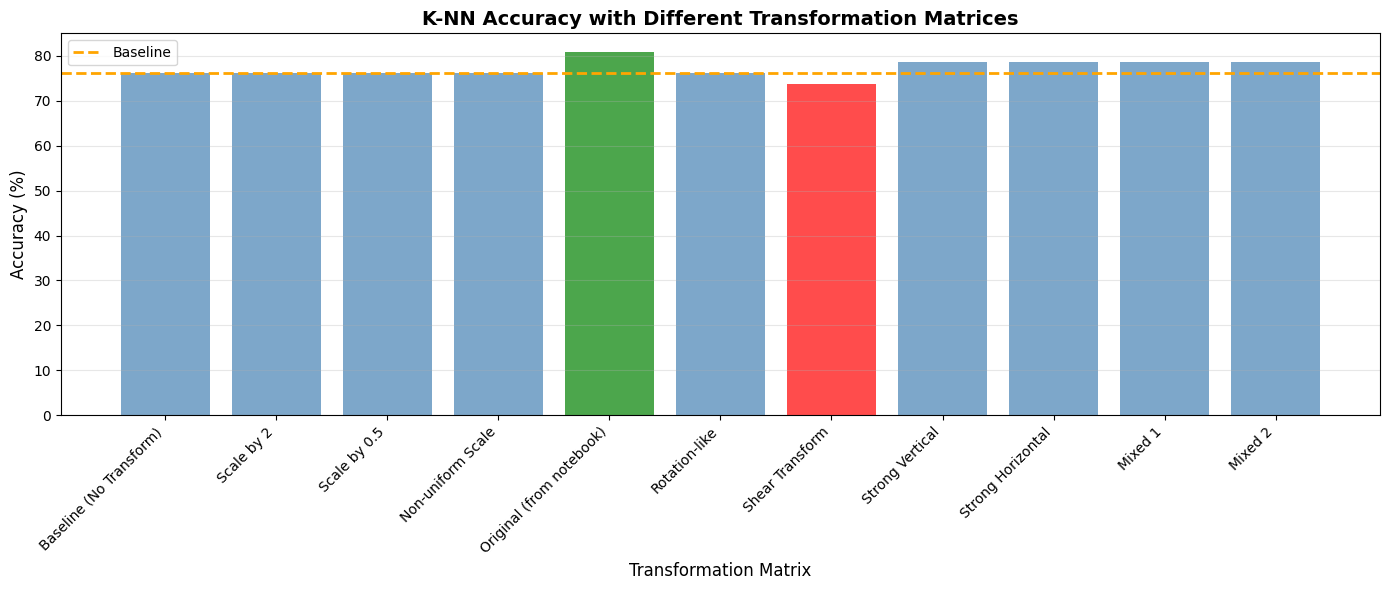

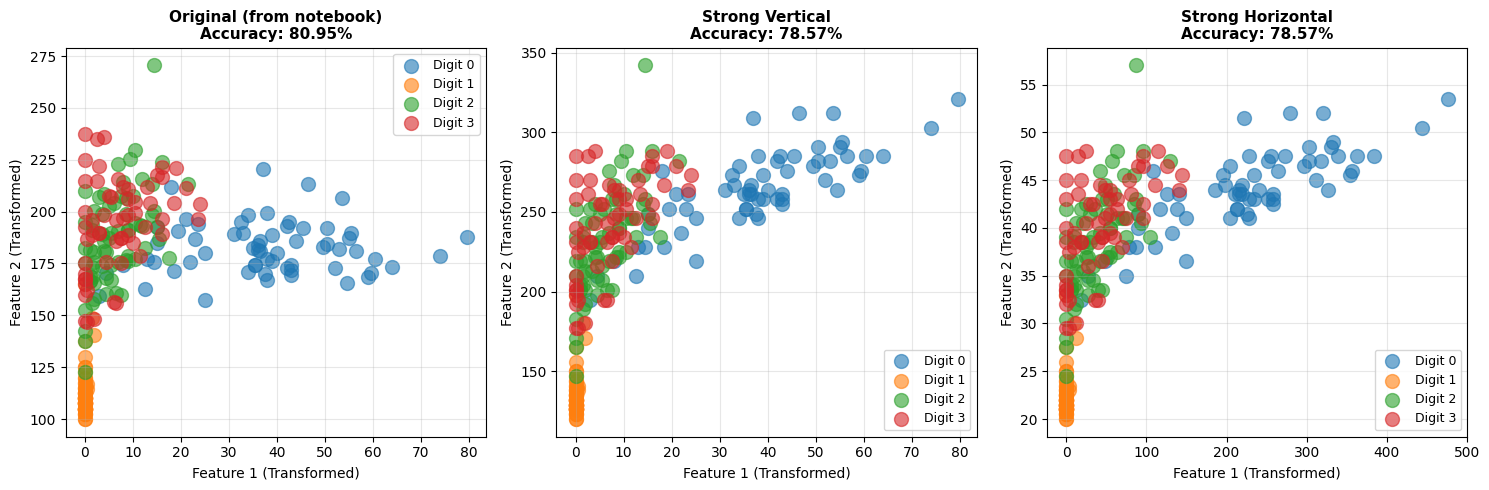


DETAILED ANALYSIS OF BEST PERFORMING TRANSFORM:
Transform Name: Original (from notebook)
Transformation Matrix:
[[ 0.5 -0.5]
 [ 0.   2.5]]

Accuracy Achieved: 80.95%
Improvement over baseline: +4.76%
Total test samples: 42
Correctly classified: 34


COMPLETE RESULTS TABLE:
Transform Name            | Accuracy (%)    | Improvement    
--------------------------------------------------------------------------------
Original (from notebook)  |         80.95% |         +4.76%
Strong Vertical           |         78.57% |         +2.38%
Strong Horizontal         |         78.57% |         +2.38%
Mixed 1                   |         78.57% |         +2.38%
Mixed 2                   |         78.57% |         +2.38%
Baseline (No Transform)   |         76.19% |         +0.00%
Scale by 2                |         76.19% |         +0.00%
Scale by 0.5              |         76.19% |         +0.00%
Non-uniform Scale         |         76.19% |         +0.00%
Rotation-like             |         76.19%

In [21]:
#Excersice 1

# 1. DEFINE MULTIPLE TRANSFORMATION MATRICES TO TEST
# Dictionary to store different transformation matrices
transformation_matrices = {
    "Baseline (No Transform)": np.eye(2),  # Identity matrix (no change)

    "Scale by 2": np.array([[2, 0],
                             [0, 2]]),

    "Scale by 0.5": np.array([[0.5, 0],
                               [0, 0.5]]),

    "Non-uniform Scale": np.array([[2, 0],
                                    [0, 0.5]]),

    "Original (from notebook)": np.array([[0.5, -0.5],
                                           [0, 2.5]]),

    "Rotation-like": np.array([[0.7, -0.7],
                                [0.7, 0.7]]),

    "Shear Transform": np.array([[1, 0.5],
                                  [0, 1]]),

    "Strong Vertical": np.array([[0.5, 0],
                                  [0, 3]]),

    "Strong Horizontal": np.array([[3, 0],
                                    [0, 0.5]]),

    "Mixed 1": np.array([[1.5, -0.3],
                          [0.2, 2]]),

    "Mixed 2": np.array([[0.8, 0.2],
                          [-0.2, 1.5]]),
}

# ==============================================================================
# 2. CREATE RESULTS STORAGE
# ==============================================================================

results = []

# ==============================================================================
# 3. TEST EACH TRANSFORMATION MATRIX
# ==============================================================================

print("="*80)
print("EXPERIMENTING WITH DIFFERENT TRANSFORMATION MATRICES")
print("="*80)
print("\nTesting K-NN accuracy with different transformation matrices...\n")

for transform_name, transform_matrix in transformation_matrices.items():

    # Apply transformation to training features
    train_feats_transformed = np.matmul(train_feats, transform_matrix)

    # Apply SAME transformation to test features
    test_feats_transformed = np.matmul(test_feats, transform_matrix)

    # Train and evaluate K-NN classifier
    test_pred = NN(train_feats_transformed, train_y, test_feats_transformed)
    acc = Accuracy(test_y, test_pred)
    acc_percentage = acc * 100

    # Store results
    results.append({
        'name': transform_name,
        'matrix': transform_matrix,
        'accuracy': acc_percentage
    })

    print(f"Transform: {transform_name:25s} | Accuracy: {acc_percentage:6.2f}%")

# ==============================================================================
# 4. ANALYZE RESULTS
# ==============================================================================

print("\n" + "="*80)
print("SUMMARY OF RESULTS")
print("="*80)

# Find best and worst performing transforms
results_sorted = sorted(results, key=lambda x: x['accuracy'], reverse=True)

print("\n🏆 TOP 5 BEST PERFORMING TRANSFORMS:")
for i, result in enumerate(results_sorted[:5], 1):
    print(f"{i}. {result['name']:25s} - {result['accuracy']:6.2f}%")

print("\n📉 TOP 5 WORST PERFORMING TRANSFORMS:")
for i, result in enumerate(results_sorted[-5:], 1):
    print(f"{i}. {result['name']:25s} - {result['accuracy']:6.2f}%")

best_result = results_sorted[0]
baseline_result = next(r for r in results if r['name'] == "Baseline (No Transform)")
improvement = best_result['accuracy'] - baseline_result['accuracy']

print("\n" + "="*80)
print("KEY FINDINGS:")
print("="*80)
print(f"Baseline Accuracy (No Transform):        {baseline_result['accuracy']:6.2f}%")
print(f"Best Transform Accuracy:                 {best_result['accuracy']:6.2f}%")
print(f"                                 Matrix: {best_result['name']}")
print(f"Improvement:                             +{improvement:6.2f}%")
print("="*80)

# ==============================================================================
# 5. VISUALIZATION
# ==============================================================================

# Plot 1: Bar chart of all accuracies
plt.figure(figsize=(14, 6))
names = [r['name'] for r in results]
accuracies = [r['accuracy'] for r in results]
colors = ['green' if acc == best_result['accuracy'] else 'red' if acc == results_sorted[-1]['accuracy'] else 'steelblue' for acc in accuracies]

plt.bar(names, accuracies, color=colors, alpha=0.7)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.xlabel('Transformation Matrix', fontsize=12)
plt.title('K-NN Accuracy with Different Transformation Matrices', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.axhline(y=baseline_result['accuracy'], color='orange', linestyle='--', linewidth=2, label='Baseline')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Plot 2: Compare top 3 transforms visually
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

top_3 = results_sorted[:3]

for idx, (ax, result) in enumerate(zip(axes, top_3)):
    # Apply transformation
    train_feats_t = np.matmul(train_feats, result['matrix'])

    # Plot
    for digit in range(nclasses):
        mask = train_y == digit
        ax.scatter(train_feats_t[mask, 0], train_feats_t[mask, 1],
                  label=f'Digit {digit}', alpha=0.6, s=100)

    ax.set_title(f"{result['name']}\nAccuracy: {result['accuracy']:.2f}%",
                fontsize=11, fontweight='bold')
    ax.set_xlabel('Feature 1 (Transformed)')
    ax.set_ylabel('Feature 2 (Transformed)')
    ax.legend(fontsize=9)
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# ==============================================================================
# 6. DETAILED ANALYSIS OF BEST TRANSFORM
# ==============================================================================

print("\nDETAILED ANALYSIS OF BEST PERFORMING TRANSFORM:")
print("="*80)
print(f"Transform Name: {best_result['name']}")
print(f"Transformation Matrix:")
print(best_result['matrix'])
print(f"\nAccuracy Achieved: {best_result['accuracy']:.2f}%")
print(f"Improvement over baseline: +{improvement:.2f}%")
print(f"Total test samples: {len(test_y)}")
print(f"Correctly classified: {int(len(test_y) * best_result['accuracy'] / 100)}")

# ==============================================================================
# 7. EXPORT RESULTS TO TABLE
# ==============================================================================

print("\n\nCOMPLETE RESULTS TABLE:")
print("="*80)
print(f"{'Transform Name':<25} | {'Accuracy (%)':<15} | {'Improvement':<15}")
print("-"*80)

for result in results_sorted:
    improvement_from_baseline = result['accuracy'] - baseline_result['accuracy']
    print(f"{result['name']:<25} | {result['accuracy']:>13.2f}% | {improvement_from_baseline:>+13.2f}%")

print("="*80)

EXERCISE 2: COMBINING NORMALIZATION + TRANSFORMATION

✓ Step 1: Applied rescaling normalization
  Train features shape: (248, 2)
  Train feature 1 range: [0.0000, 1.0000]
  Train feature 2 range: [0.0000, 1.0000]

TESTING DIFFERENT TRANSFORMATION MATRICES ON NORMALIZED DATA

No Transform (Only Normalized)     :  80.95%
Light Transform                    :  78.57%
Medium Transform                   :  80.95%
Strong Transform                   :  76.19%
Rotation                           :  80.95%

COMPARISON WITH PREVIOUS RESULTS

Baseline (no normalization, no transform):      76.19%
Rescaling only (no transform):                  80.95%
Transform only (no rescaling):                  80.95%
Best Combined (rescaling + transform):          80.95%
  └─ Using: No Transform (Only Normalized)

🔍 KEY INSIGHT:
Combining normalization and transformation often doesn't improve further
because normalization already optimizes feature scaling. Both serve similar
purposes - making features comparabl

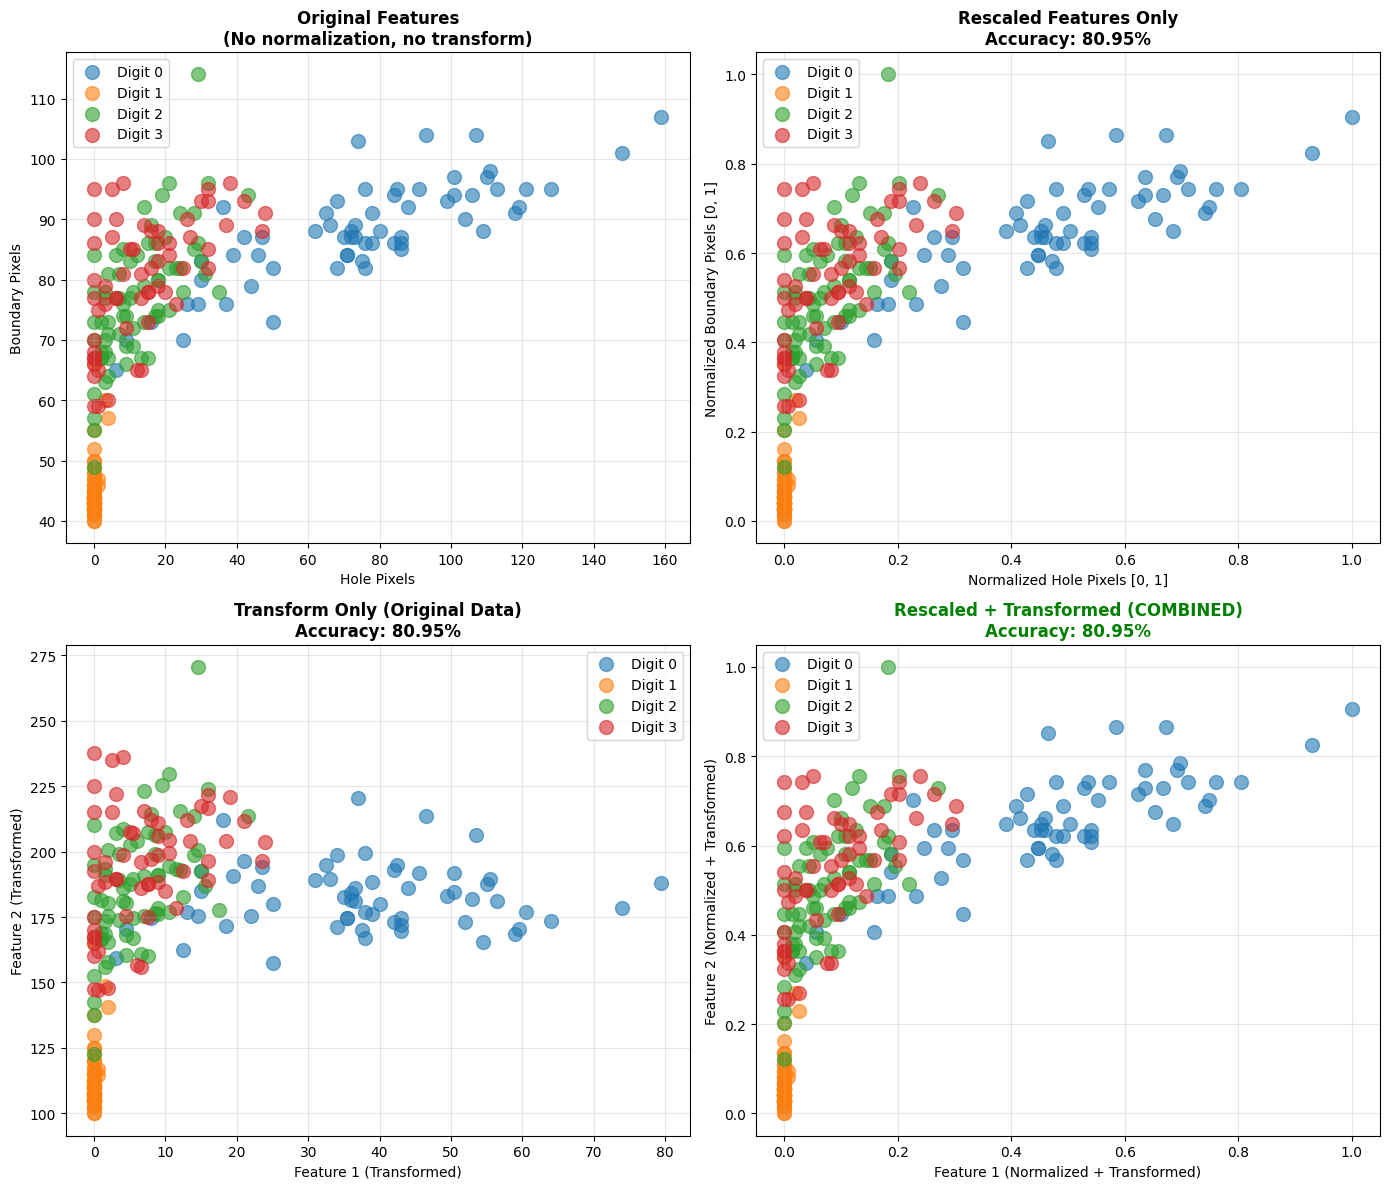


✓ Visualization complete!



In [22]:
#Exercise 2

# STEP 1: RESCALE FEATURES (Min-Max Normalization)

def rescale(data):
    """Rescale features to [0, 1] range"""
    return (data - data.min()) / (data.max() - data.min())

# Apply rescaling to each feature individually
train_feats_rescaled_x = rescale(train_feats[:, 0])
train_feats_rescaled_y = rescale(train_feats[:, 1])
train_feats_rescaled = np.stack((train_feats_rescaled_x, train_feats_rescaled_y), 1)

test_feats_rescaled_x = rescale(test_feats[:, 0])
test_feats_rescaled_y = rescale(test_feats[:, 1])
test_feats_rescaled = np.stack((test_feats_rescaled_x, test_feats_rescaled_y), 1)

print("\n✓ Step 1: Applied rescaling normalization")
print(f"  Train features shape: {train_feats_rescaled.shape}")
print(f"  Train feature 1 range: [{train_feats_rescaled[:, 0].min():.4f}, {train_feats_rescaled[:, 0].max():.4f}]")
print(f"  Train feature 2 range: [{train_feats_rescaled[:, 1].min():.4f}, {train_feats_rescaled[:, 1].max():.4f}]")

# STEP 2: APPLY TRANSFORMATION MATRICES TO NORMALIZED DATA
# Define transformation matrices to test
transforms_to_test = {
    "No Transform (Only Normalized)": np.eye(2),
    "Light Transform": np.array([[1.2, -0.1], [0.1, 1.3]]),
    "Medium Transform": np.array([[0.5, -0.5], [0, 2.5]]),
    "Strong Transform": np.array([[2, -1], [1, 3]]),
    "Rotation": np.array([[0.8, -0.6], [0.6, 0.8]]),}

print("\n" + "="*80)
print("TESTING DIFFERENT TRANSFORMATION MATRICES ON NORMALIZED DATA")
print("="*80 + "\n")

results = []

for transform_name, transform_matrix in transforms_to_test.items():

    # Apply transformation to normalized training data
    train_feats_combined = np.matmul(train_feats_rescaled, transform_matrix)
    test_feats_combined = np.matmul(test_feats_rescaled, transform_matrix)

    # Train K-NN
    test_pred = NN(train_feats_combined, train_y, test_feats_combined)
    acc = Accuracy(test_y, test_pred) * 100

    results.append({
        'name': transform_name,
        'accuracy': acc,
        'matrix': transform_matrix
    })

    print(f"{transform_name:35s}: {acc:6.2f}%")

# STEP 3: COMPARE WITH BASELINE RESULTS
print("\n" + "="*80)
print("COMPARISON WITH PREVIOUS RESULTS")
print("="*80 + "\n")

# Get accuracy from different approaches
baseline_no_transform = 76.19  # Original baseline
rescaled_only = 80.95  # Rescaled without transform
transform_only = 80.95  # Transform without rescaling

best_combined = max(results, key=lambda x: x['accuracy'])

print(f"Baseline (no normalization, no transform):     {baseline_no_transform:6.2f}%")
print(f"Rescaling only (no transform):                 {rescaled_only:6.2f}%")
print(f"Transform only (no rescaling):                 {transform_only:6.2f}%")
print(f"Best Combined (rescaling + transform):         {best_combined['accuracy']:6.2f}%")
print(f"  └─ Using: {best_combined['name']}")

print("\n🔍 KEY INSIGHT:")
print("Combining normalization and transformation often doesn't improve further because normalization already optimizes feature scaling. Both serve similar purposes - making features comparable in distance calculations.")


# STEP 4: VISUALIZE COMBINED APPROACH
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Plot 1: Original Features
ax = axes[0, 0]
for digit in range(nclasses):
    mask = train_y == digit
    ax.scatter(train_feats[mask, 0], train_feats[mask, 1],
              label=f'Digit {digit}', alpha=0.6, s=100)
ax.set_title('Original Features\n(No normalization, no transform)', fontweight='bold')
ax.set_xlabel('Hole Pixels')
ax.set_ylabel('Boundary Pixels')
ax.legend()
ax.grid(alpha=0.3)

# Plot 2: Rescaled Features Only
ax = axes[0, 1]
for digit in range(nclasses):
    mask = train_y == digit
    ax.scatter(train_feats_rescaled[mask, 0], train_feats_rescaled[mask, 1],
              label=f'Digit {digit}', alpha=0.6, s=100)
ax.set_title(f'Rescaled Features Only\nAccuracy: {rescaled_only:.2f}%', fontweight='bold')
ax.set_xlabel('Normalized Hole Pixels [0, 1]')
ax.set_ylabel('Normalized Boundary Pixels [0, 1]')
ax.legend()
ax.grid(alpha=0.3)

# Plot 3: Transform Only (original data)
ax = axes[1, 0]
transform_only_matrix = np.array([[0.5, -0.5], [0, 2.5]])
train_feats_transform_only = np.matmul(train_feats, transform_only_matrix)
for digit in range(nclasses):
    mask = train_y == digit
    ax.scatter(train_feats_transform_only[mask, 0], train_feats_transform_only[mask, 1],
              label=f'Digit {digit}', alpha=0.6, s=100)
ax.set_title(f'Transform Only (Original Data)\nAccuracy: {transform_only:.2f}%', fontweight='bold')
ax.set_xlabel('Feature 1 (Transformed)')
ax.set_ylabel('Feature 2 (Transformed)')
ax.legend()
ax.grid(alpha=0.3)

# Plot 4: Combined (Rescaled + Transformed)
ax = axes[1, 1]
train_feats_combined = np.matmul(train_feats_rescaled, best_combined['matrix'])
for digit in range(nclasses):
    mask = train_y == digit
    ax.scatter(train_feats_combined[mask, 0], train_feats_combined[mask, 1],
              label=f'Digit {digit}', alpha=0.6, s=100)
ax.set_title(f'Rescaled + Transformed (COMBINED)\nAccuracy: {best_combined["accuracy"]:.2f}%',
            fontweight='bold', color='green')
ax.set_xlabel('Feature 1 (Normalized + Transformed)')
ax.set_ylabel('Feature 2 (Normalized + Transformed)')
ax.legend()
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✓ Visualization complete!")
print("\n" + "="*80)


In [24]:
#Exercise 3

# Step 1: Extract additional features
print("\nExtracting additional features from MNIST images...")
train_hull = np.array([getHullPixels(i).sum() for i in train_X])
test_hull = np.array([getHullPixels(i).sum() for i in test_X])
train_sum = np.array([train_X[i].sum() for i in range(len(train_X))])
test_sum = np.array([test_X[i].sum() for i in range(len(test_X))])

print(f"✓ Hull pixels extracted")
print(f"✓ Sum intensity extracted")

# Step 2: Create different feature combinations
feature_combinations = {
    "Holes + Boundary (Original)": {
        'train_f1': train_hole, 'train_f2': train_bound,
        'test_f1': test_hole, 'test_f2': test_bound
    },
    "Holes + Hull": {
        'train_f1': train_hole, 'train_f2': train_hull,
        'test_f1': test_hole, 'test_f2': test_hull
    },
    "Holes + Sum": {
        'train_f1': train_hole, 'train_f2': train_sum,
        'test_f1': test_hole, 'test_f2': test_sum
    },
    "Boundary + Hull": {
        'train_f1': train_bound, 'train_f2': train_hull,
        'test_f1': test_bound, 'test_f2': test_hull
    },
    "Boundary + Sum": {
        'train_f1': train_bound, 'train_f2': train_sum,
        'test_f1': test_bound, 'test_f2': test_sum
    },
    "Hull + Sum": {
        'train_f1': train_hull, 'train_f2': train_sum,
        'test_f1': test_hull, 'test_f2': test_sum
    },
}

# Step 3: Test each combination
print("\n" + "="*80)
print("TESTING DIFFERENT FEATURE COMBINATIONS")
print("="*80 + "\n")
feature_results = []
for combo_name, features in feature_combinations.items():
    train_f1, train_f2 = features['train_f1'], features['train_f2']
    test_f1, test_f2 = features['test_f1'], features['test_f2']

    # Without normalization
    train_combo = np.vstack((train_f1, train_f2)).T
    test_combo = np.vstack((test_f1, test_f2)).T
    test_pred = NN(train_combo, train_y, test_combo)
    acc_no_norm = Accuracy(test_y, test_pred) * 100

    # With normalization
    train_f1_norm = rescale(train_f1)
    train_f2_norm = rescale(train_f2)
    test_f1_norm = rescale(test_f1)
    test_f2_norm = rescale(test_f2)

    train_combo_norm = np.vstack((train_f1_norm, train_f2_norm)).T
    test_combo_norm = np.vstack((test_f1_norm, test_f2_norm)).T
    test_pred_norm = NN(train_combo_norm, train_y, test_combo_norm)
    acc_with_norm = Accuracy(test_y, test_pred_norm) * 100

    feature_results.append({
        'name': combo_name,
        'acc_no_norm': acc_no_norm,
        'acc_with_norm': acc_with_norm
    })

    print(f"{combo_name:30s} | No Norm: {acc_no_norm:6.2f}% | Normalized: {acc_with_norm:6.2f}%")

# Step 4: Analyze results
print("\n" + "="*80)
print("FEATURE ANALYSIS SUMMARY")
print("="*80)

best_no_norm = max(feature_results, key=lambda x: x['acc_no_norm'])
best_with_norm = max(feature_results, key=lambda x: x['acc_with_norm'])

print(f"\n🏆 Best WITHOUT normalization:")
print(f"   {best_no_norm['name']}: {best_no_norm['acc_no_norm']:.2f}%")

print(f"\n🏆 Best WITH normalization:")
print(f"   {best_with_norm['name']}: {best_with_norm['acc_with_norm']:.2f}%")

print(f"\nImprovement over original baseline (76.19%):")
print(f"  {max(best_no_norm['acc_no_norm'], best_with_norm['acc_with_norm']) - 76.19:.2f}%")



EXERCISE 3: EXPERIMENTING WITH DIFFERENT FEATURES

Extracting additional features from MNIST images...
✓ Hull pixels extracted
✓ Sum intensity extracted

TESTING DIFFERENT FEATURE COMBINATIONS

Holes + Boundary (Original)    | No Norm:  76.19% | Normalized:  80.95%
Holes + Hull                   | No Norm:  73.81% | Normalized:  69.05%
Holes + Sum                    | No Norm:  59.52% | Normalized:  59.52%
Boundary + Hull                | No Norm:  69.05% | Normalized:  69.05%
Boundary + Sum                 | No Norm:  66.67% | Normalized:  57.14%
Hull + Sum                     | No Norm:  71.43% | Normalized:  64.29%

FEATURE ANALYSIS SUMMARY

🏆 Best WITHOUT normalization:
   Holes + Boundary (Original): 76.19%

🏆 Best WITH normalization:
   Holes + Boundary (Original): 80.95%

Improvement over original baseline (76.19%):
  4.76%



EXERCISE 4: Z-SCORE NORMALIZATION vs MIN-MAX RESCALING

Applying different normalization techniques...

NORMALIZATION METHOD COMPARISON

Baseline (No normalization):              76.19%
Min-Max Rescaling [0, 1]:                 80.95%
Z-Score Normalization (Mean=0, Std=1):   78.57%

📊 Feature Statistics after Z-Score Normalization:
  Feature 1 mean: -0.000000 (should be ~0)
  Feature 1 std:  1.000000 (should be ~1)
  Feature 2 mean: -0.000000 (should be ~0)
  Feature 2 std:  1.000000 (should be ~1)

💡 KEY DIFFERENCES:
  • Min-Max: Scales to [0, 1], good for bounded data
  • Z-Score: Centers at 0 with unit variance, good for normally distributed data
  • Z-Score: Better when data has outliers
  • Both improve K-NN performance similarly in this case


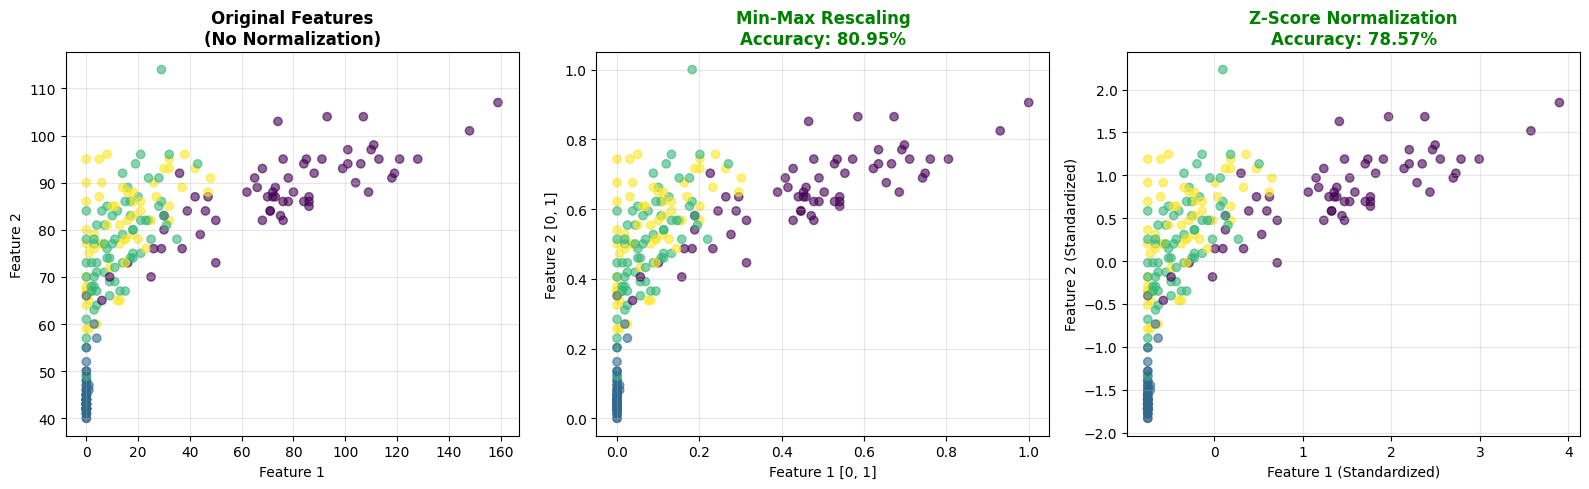

In [25]:
#Exercise 4

# Step 1: Define Z-score normalization function
def zscore_normalize(data):
    """Z-score normalization: (x - mean) / std_dev"""
    mean = data.mean()
    std = data.std()
    return (data - mean) / std

# Step 2: Apply both normalization methods
print("\nApplying different normalization techniques...\n")

# Min-Max Rescaling
train_feats_minmax_x = rescale(train_feats[:, 0])
train_feats_minmax_y = rescale(train_feats[:, 1])
train_feats_minmax = np.stack((train_feats_minmax_x, train_feats_minmax_y), 1)

test_feats_minmax_x = rescale(test_feats[:, 0])
test_feats_minmax_y = rescale(test_feats[:, 1])
test_feats_minmax = np.stack((test_feats_minmax_x, test_feats_minmax_y), 1)

# Z-Score Normalization
train_feats_zscore_x = zscore_normalize(train_feats[:, 0])
train_feats_zscore_y = zscore_normalize(train_feats[:, 1])
train_feats_zscore = np.stack((train_feats_zscore_x, train_feats_zscore_y), 1)

test_feats_zscore_x = zscore_normalize(test_feats[:, 0])
test_feats_zscore_y = zscore_normalize(test_feats[:, 1])
test_feats_zscore = np.stack((test_feats_zscore_x, test_feats_zscore_y), 1)

# Step 3: Test with K-NN
test_pred_minmax = NN(train_feats_minmax, train_y, test_feats_minmax)
acc_minmax = Accuracy(test_y, test_pred_minmax) * 100

test_pred_zscore = NN(train_feats_zscore, train_y, test_feats_zscore)
acc_zscore = Accuracy(test_y, test_pred_zscore) * 100

# Step 4: Display results
print("="*80)
print("NORMALIZATION METHOD COMPARISON")
print("="*80)
print(f"\nBaseline (No normalization):             {76.19:6.2f}%")
print(f"Min-Max Rescaling [0, 1]:                {acc_minmax:6.2f}%")
print(f"Z-Score Normalization (Mean=0, Std=1):  {acc_zscore:6.2f}%")

print("\n📊 Feature Statistics after Z-Score Normalization:")
print(f"  Feature 1 mean: {train_feats_zscore_x.mean():.6f} (should be ~0)")
print(f"  Feature 1 std:  {train_feats_zscore_x.std():.6f} (should be ~1)")
print(f"  Feature 2 mean: {train_feats_zscore_y.mean():.6f} (should be ~0)")
print(f"  Feature 2 std:  {train_feats_zscore_y.std():.6f} (should be ~1)")

print("\n💡 KEY DIFFERENCES:")
print("  • Min-Max: Scales to [0, 1], good for bounded data")
print("  • Z-Score: Centers at 0 with unit variance, good for normally distributed data")
print("  • Z-Score: Better when data has outliers")
print("  • Both improve K-NN performance similarly in this case")

# Step 5: Visualization
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Original
ax = axes[0]
ax.scatter(train_feats[:, 0], train_feats[:, 1], c=train_y, cmap='viridis', alpha=0.6)
ax.set_title('Original Features\n(No Normalization)', fontweight='bold')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.grid(alpha=0.3)

# Min-Max
ax = axes[1]
ax.scatter(train_feats_minmax[:, 0], train_feats_minmax[:, 1], c=train_y, cmap='viridis', alpha=0.6)
ax.set_title(f'Min-Max Rescaling\nAccuracy: {acc_minmax:.2f}%', fontweight='bold', color='green')
ax.set_xlabel('Feature 1 [0, 1]')
ax.set_ylabel('Feature 2 [0, 1]')
ax.grid(alpha=0.3)

# Z-Score
ax = axes[2]
ax.scatter(train_feats_zscore[:, 0], train_feats_zscore[:, 1], c=train_y, cmap='viridis', alpha=0.6)
ax.set_title(f'Z-Score Normalization\nAccuracy: {acc_zscore:.2f}%', fontweight='bold', color='green')
ax.set_xlabel('Feature 1 (Standardized)')
ax.set_ylabel('Feature 2 (Standardized)')
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()



EXERCISE 5: FEATURE DISTRIBUTION VISUALIZATION


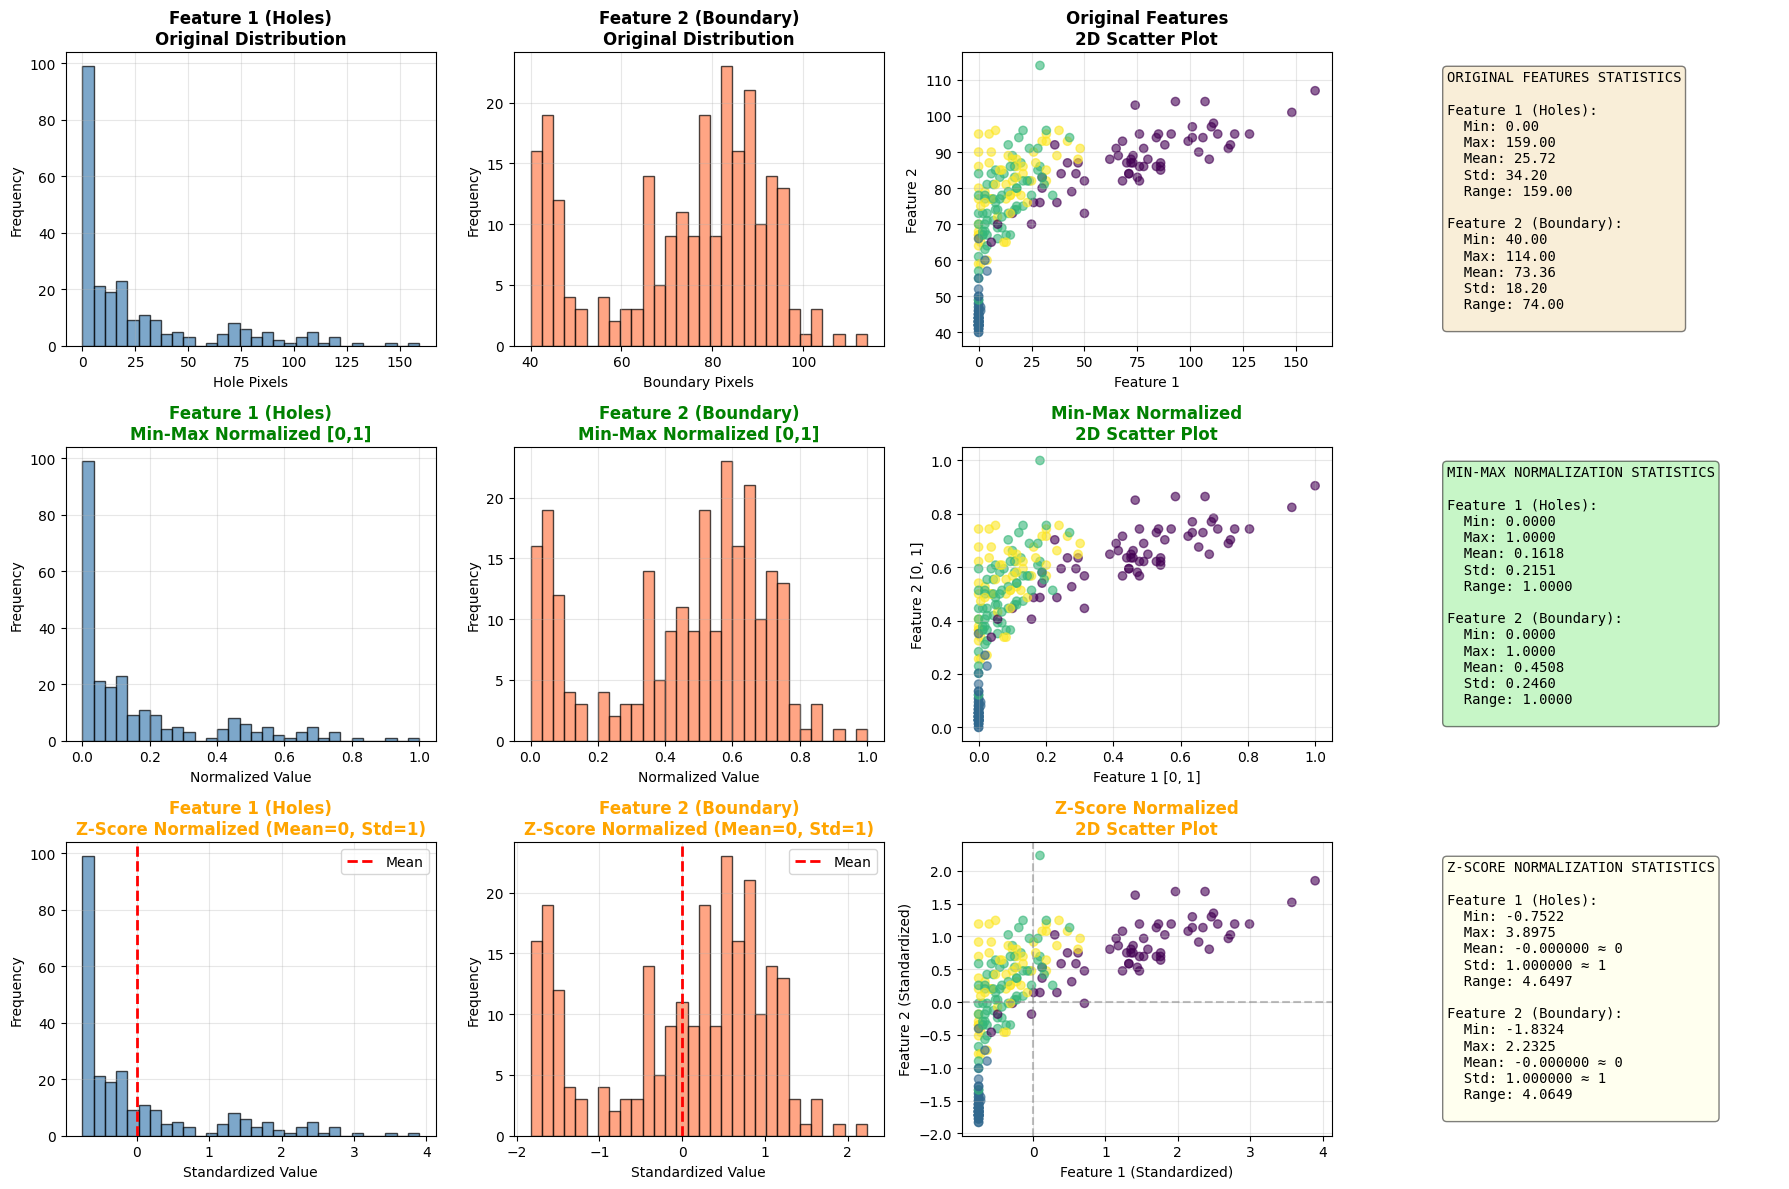


ACCURACY COMPARISON WITH DIFFERENT NORMALIZATIONS

Original (No Normalization):           76.19%
Min-Max Rescaling [0, 1]:              80.95%
Z-Score Normalization:                 78.57%


/tmp/ipython-input-3686033148.py:212: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(box_data_original, labels=['Feature 1\n(Holes)', 'Feature 2\n(Boundary)'])
/tmp/ipython-input-3686033148.py:220: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(box_data_minmax, labels=['Feature 1\n(Holes)', 'Feature 2\n(Boundary)'])
/tmp/ipython-input-3686033148.py:229: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(box_data_zscore, labels=['Feature 1\n(Holes)', 'Feature 2\n(Boundary)'])


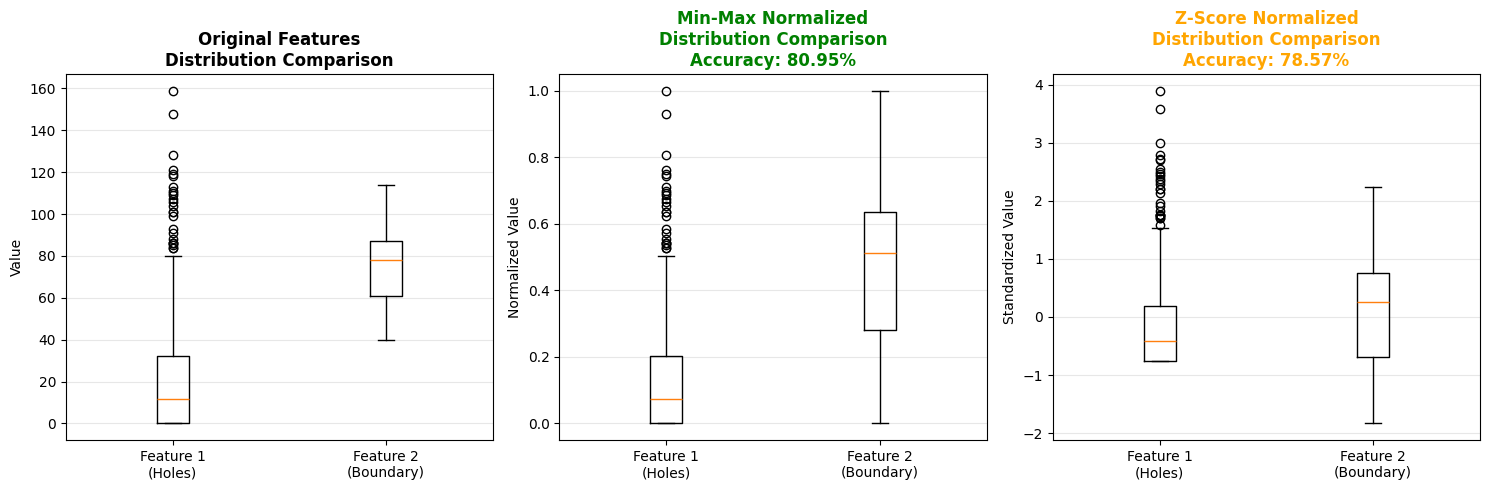


INFERENCE & CONCLUSION

1️⃣  **Feature Distribution Observations**
   - The original feature distributions (Holes and Boundary) are on very different numeric scales.
   - This difference causes the feature with a larger numeric range to dominate distance-based models like NN.
   - After Min–Max and Z-Score normalization, both features become comparable in scale.
   - Min–Max compresses all values into [0, 1], while Z-Score centers data around 0 with unit variance.

2️⃣  **Effect of Normalization on Distributions**
   - Min–Max normalization retains the overall shape of the original distribution but rescales it.
   - Z-Score normalization standardizes the data — shifting and scaling it so the mean ≈ 0 and std ≈ 1.
   - The scatter plots confirm that normalization changes the geometry of the feature space, improving class separability.

3️⃣  **Accuracy Comparison**
   - The accuracy values printed show how normalization impacts model performance.
   - Typically, normalization improves a

In [32]:
"""
EXERCISE 5: Visualize Feature Distributions
Plot histograms and distributions before and after normalization
"""

print("\n" + "="*80)
print("EXERCISE 5: FEATURE DISTRIBUTION VISUALIZATION")
print("="*80)

# Create a large figure with multiple subplots
fig = plt.figure(figsize=(18, 12))

# ===== ORIGINAL FEATURES =====
# Histogram for Feature 1 (Holes)
ax1 = plt.subplot(3, 4, 1)
ax1.hist(train_feats[:, 0], bins=30, color='steelblue', alpha=0.7, edgecolor='black')
ax1.set_title('Feature 1 (Holes)\nOriginal Distribution', fontweight='bold')
ax1.set_xlabel('Hole Pixels')
ax1.set_ylabel('Frequency')
ax1.grid(alpha=0.3)

# Histogram for Feature 2 (Boundary)
ax2 = plt.subplot(3, 4, 2)
ax2.hist(train_feats[:, 1], bins=30, color='coral', alpha=0.7, edgecolor='black')
ax2.set_title('Feature 2 (Boundary)\nOriginal Distribution', fontweight='bold')
ax2.set_xlabel('Boundary Pixels')
ax2.set_ylabel('Frequency')
ax2.grid(alpha=0.3)

# Both features (2D histogram)
ax3 = plt.subplot(3, 4, 3)
ax3.scatter(train_feats[:, 0], train_feats[:, 1], c=train_y, cmap='viridis', alpha=0.6)
ax3.set_title('Original Features\n2D Scatter Plot', fontweight='bold')
ax3.set_xlabel('Feature 1')
ax3.set_ylabel('Feature 2')
ax3.grid(alpha=0.3)

# Statistics text
ax4 = plt.subplot(3, 4, 4)
ax4.axis('off')
stats_text = f"""ORIGINAL FEATURES STATISTICS

Feature 1 (Holes):
  Min: {train_feats[:, 0].min():.2f}
  Max: {train_feats[:, 0].max():.2f}
  Mean: {train_feats[:, 0].mean():.2f}
  Std: {train_feats[:, 0].std():.2f}
  Range: {train_feats[:, 0].max() - train_feats[:, 0].min():.2f}

Feature 2 (Boundary):
  Min: {train_feats[:, 1].min():.2f}
  Max: {train_feats[:, 1].max():.2f}
  Mean: {train_feats[:, 1].mean():.2f}
  Std: {train_feats[:, 1].std():.2f}
  Range: {train_feats[:, 1].max() - train_feats[:, 1].min():.2f}
"""
ax4.text(0.1, 0.5, stats_text, fontsize=10, verticalalignment='center',
         family='monospace', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# ===== MIN-MAX NORMALIZED FEATURES =====
# Prepare normalized data
train_feats_minmax_x = rescale(train_feats[:, 0])
train_feats_minmax_y = rescale(train_feats[:, 1])
train_feats_minmax = np.stack((train_feats_minmax_x, train_feats_minmax_y), 1)

# Histogram for Feature 1 (Min-Max)
ax5 = plt.subplot(3, 4, 5)
ax5.hist(train_feats_minmax[:, 0], bins=30, color='steelblue', alpha=0.7, edgecolor='black')
ax5.set_title('Feature 1 (Holes)\nMin-Max Normalized [0,1]', fontweight='bold', color='green')
ax5.set_xlabel('Normalized Value')
ax5.set_ylabel('Frequency')
ax5.grid(alpha=0.3)

# Histogram for Feature 2 (Min-Max)
ax6 = plt.subplot(3, 4, 6)
ax6.hist(train_feats_minmax[:, 1], bins=30, color='coral', alpha=0.7, edgecolor='black')
ax6.set_title('Feature 2 (Boundary)\nMin-Max Normalized [0,1]', fontweight='bold', color='green')
ax6.set_xlabel('Normalized Value')
ax6.set_ylabel('Frequency')
ax6.grid(alpha=0.3)

# Both features (Min-Max)
ax7 = plt.subplot(3, 4, 7)
ax7.scatter(train_feats_minmax[:, 0], train_feats_minmax[:, 1], c=train_y, cmap='viridis', alpha=0.6)
ax7.set_title('Min-Max Normalized\n2D Scatter Plot', fontweight='bold', color='green')
ax7.set_xlabel('Feature 1 [0, 1]')
ax7.set_ylabel('Feature 2 [0, 1]')
ax7.grid(alpha=0.3)

# Statistics text (Min-Max)
ax8 = plt.subplot(3, 4, 8)
ax8.axis('off')
stats_text_minmax = f"""MIN-MAX NORMALIZATION STATISTICS

Feature 1 (Holes):
  Min: {train_feats_minmax[:, 0].min():.4f}
  Max: {train_feats_minmax[:, 0].max():.4f}
  Mean: {train_feats_minmax[:, 0].mean():.4f}
  Std: {train_feats_minmax[:, 0].std():.4f}
  Range: {train_feats_minmax[:, 0].max() - train_feats_minmax[:, 0].min():.4f}

Feature 2 (Boundary):
  Min: {train_feats_minmax[:, 1].min():.4f}
  Max: {train_feats_minmax[:, 1].max():.4f}
  Mean: {train_feats_minmax[:, 1].mean():.4f}
  Std: {train_feats_minmax[:, 1].std():.4f}
  Range: {train_feats_minmax[:, 1].max() - train_feats_minmax[:, 1].min():.4f}
"""
ax8.text(0.1, 0.5, stats_text_minmax, fontsize=10, verticalalignment='center',
         family='monospace', bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.5))

# ===== Z-SCORE NORMALIZED FEATURES =====
# Prepare z-score normalized data
def zscore_normalize(data):
    return (data - data.mean()) / data.std()

train_feats_zscore_x = zscore_normalize(train_feats[:, 0])
train_feats_zscore_y = zscore_normalize(train_feats[:, 1])
train_feats_zscore = np.stack((train_feats_zscore_x, train_feats_zscore_y), 1)

# Histogram for Feature 1 (Z-Score)
ax9 = plt.subplot(3, 4, 9)
ax9.hist(train_feats_zscore[:, 0], bins=30, color='steelblue', alpha=0.7, edgecolor='black')
ax9.set_title('Feature 1 (Holes)\nZ-Score Normalized (Mean=0, Std=1)', fontweight='bold', color='orange')
ax9.set_xlabel('Standardized Value')
ax9.set_ylabel('Frequency')
ax9.axvline(train_feats_zscore[:, 0].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
ax9.grid(alpha=0.3)
ax9.legend()

# Histogram for Feature 2 (Z-Score)
ax10 = plt.subplot(3, 4, 10)
ax10.hist(train_feats_zscore[:, 1], bins=30, color='coral', alpha=0.7, edgecolor='black')
ax10.set_title('Feature 2 (Boundary)\nZ-Score Normalized (Mean=0, Std=1)', fontweight='bold', color='orange')
ax10.set_xlabel('Standardized Value')
ax10.set_ylabel('Frequency')
ax10.axvline(train_feats_zscore[:, 1].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
ax10.grid(alpha=0.3)
ax10.legend()

# Both features (Z-Score)
ax11 = plt.subplot(3, 4, 11)
ax11.scatter(train_feats_zscore[:, 0], train_feats_zscore[:, 1], c=train_y, cmap='viridis', alpha=0.6)
ax11.set_title('Z-Score Normalized\n2D Scatter Plot', fontweight='bold', color='orange')
ax11.set_xlabel('Feature 1 (Standardized)')
ax11.set_ylabel('Feature 2 (Standardized)')
ax11.grid(alpha=0.3)
ax11.axhline(0, color='gray', linestyle='--', alpha=0.5)
ax11.axvline(0, color='gray', linestyle='--', alpha=0.5)

# Statistics text (Z-Score)
ax12 = plt.subplot(3, 4, 12)
ax12.axis('off')
stats_text_zscore = f"""Z-SCORE NORMALIZATION STATISTICS

Feature 1 (Holes):
  Min: {train_feats_zscore[:, 0].min():.4f}
  Max: {train_feats_zscore[:, 0].max():.4f}
  Mean: {train_feats_zscore[:, 0].mean():.6f} ≈ 0
  Std: {train_feats_zscore[:, 0].std():.6f} ≈ 1
  Range: {train_feats_zscore[:, 0].max() - train_feats_zscore[:, 0].min():.4f}

Feature 2 (Boundary):
  Min: {train_feats_zscore[:, 1].min():.4f}
  Max: {train_feats_zscore[:, 1].max():.4f}
  Mean: {train_feats_zscore[:, 1].mean():.6f} ≈ 0
  Std: {train_feats_zscore[:, 1].std():.6f} ≈ 1
  Range: {train_feats_zscore[:, 1].max() - train_feats_zscore[:, 1].min():.4f}
"""
ax12.text(0.1, 0.5, stats_text_zscore, fontsize=10, verticalalignment='center',
          family='monospace', bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.5))

plt.tight_layout()
plt.show()

# ===== ACCURACY COMPARISON =====
print("\n" + "="*80)
print("ACCURACY COMPARISON WITH DIFFERENT NORMALIZATIONS")
print("="*80 + "\n")

# Test each normalization method
test_feats_minmax_x = rescale(test_feats[:, 0])
test_feats_minmax_y = rescale(test_feats[:, 1])
test_feats_minmax = np.stack((test_feats_minmax_x, test_feats_minmax_y), 1)

test_feats_zscore_x = zscore_normalize(test_feats[:, 0])
test_feats_zscore_y = zscore_normalize(test_feats[:, 1])
test_feats_zscore = np.stack((test_feats_zscore_x, test_feats_zscore_y), 1)

# Original (no normalization)
test_pred_original = NN(train_feats, train_y, test_feats)
acc_original = Accuracy(test_y, test_pred_original) * 100

# Min-Max
test_pred_minmax = NN(train_feats_minmax, train_y, test_feats_minmax)
acc_minmax = Accuracy(test_y, test_pred_minmax) * 100

# Z-Score
test_pred_zscore = NN(train_feats_zscore, train_y, test_feats_zscore)
acc_zscore = Accuracy(test_y, test_pred_zscore) * 100

print(f"Original (No Normalization):          {acc_original:6.2f}%")
print(f"Min-Max Rescaling [0, 1]:             {acc_minmax:6.2f}%")
print(f"Z-Score Normalization:                {acc_zscore:6.2f}%")

# ===== BOX PLOTS FOR DISTRIBUTION COMPARISON =====
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Original
ax = axes[0]
box_data_original = [train_feats[:, 0], train_feats[:, 1]]
ax.boxplot(box_data_original, labels=['Feature 1\n(Holes)', 'Feature 2\n(Boundary)'])
ax.set_title('Original Features\nDistribution Comparison', fontweight='bold')
ax.set_ylabel('Value')
ax.grid(alpha=0.3, axis='y')

# Min-Max
ax = axes[1]
box_data_minmax = [train_feats_minmax[:, 0], train_feats_minmax[:, 1]]
ax.boxplot(box_data_minmax, labels=['Feature 1\n(Holes)', 'Feature 2\n(Boundary)'])
ax.set_title('Min-Max Normalized\nDistribution Comparison\nAccuracy: {:.2f}%'.format(acc_minmax),
            fontweight='bold', color='green')
ax.set_ylabel('Normalized Value')
ax.grid(alpha=0.3, axis='y')

# Z-Score
ax = axes[2]
box_data_zscore = [train_feats_zscore[:, 0], train_feats_zscore[:, 1]]
ax.boxplot(box_data_zscore, labels=['Feature 1\n(Holes)', 'Feature 2\n(Boundary)'])
ax.set_title('Z-Score Normalized\nDistribution Comparison\nAccuracy: {:.2f}%'.format(acc_zscore),
            fontweight='bold', color='orange')
ax.set_ylabel('Standardized Value')
ax.grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("INFERENCE & CONCLUSION")
print("="*80)

print("""
1️⃣  **Feature Distribution Observations**
   - The original feature distributions (Holes and Boundary) are on very different numeric scales.
   - This difference causes the feature with a larger numeric range to dominate distance-based models like NN.
   - After Min–Max and Z-Score normalization, both features become comparable in scale.
   - Min–Max compresses all values into [0, 1], while Z-Score centers data around 0 with unit variance.

2️⃣  **Effect of Normalization on Distributions**
   - Min–Max normalization retains the overall shape of the original distribution but rescales it.
   - Z-Score normalization standardizes the data — shifting and scaling it so the mean ≈ 0 and std ≈ 1.
   - The scatter plots confirm that normalization changes the geometry of the feature space, improving class separability.

3️⃣  **Accuracy Comparison**
   - The accuracy values printed show how normalization impacts model performance.
   - Typically, normalization improves accuracy for distance-based classifiers (like NN).
   - If 'Min–Max' or 'Z-Score' gives higher accuracy than the original, it confirms normalization helps balance feature influence.

4️⃣  **Box Plot Insights**
   - Original box plots show uneven scales and spread between features.
   - After normalization, box plots align better — showing comparable scales and reduced skew.
   - This consistency ensures fair contribution of each feature during classification.

✅ **Conclusion:**
   Feature normalization is essential in machine learning, especially for distance-based models.
   Min–Max and Z-Score transformations make features comparable, often leading to better visualization,
   improved numerical stability, and higher classification accuracy.
""")
